In [3]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn
% matplotlib inline

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 200
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Median qi's
### Pool

In [2]:

# # These files have the time evolution of Q, q, i quantiles.
# # filename = './../../data/processed/exp_var_'+dist+'_1s_'+sizes+'.csv'

# df_x0var_pool_l = []
# T = 16 - 1
# for sizes in ['logn90', 'pareto']:
#     print(sizes)
#     for dist in ['emp_szd_T16','norm', 'lapl']:
#         print(dist)
#         # Load previously simulated
# #         filename = './../../data/processed/exp_var_'+dist+'_1s_'+sizes+'.csv'
# #         df = pd.read_csv(filename).set_index(['Q', 'q', 'i']).sort_index()
#         df = pd.read_csv('./../../data/processed/exp_var_'+dist+'_1s_'+sizes+'_5s_70Qqs_40i_.csv')

# #         df['ti'] = df['var_qi']/df['s']**2
# #         df['tdiffi'] = df['var_diff_qi']/df['s']**2

#         I = df['i'].max() + 1; keep = int(.5*I)    
#         ### 
#         # DROP CASES WHERE QUANTILES ARE FAR FROM BALANCED
#         ###
#         df = df.reset_index().set_index(['s','Q', 'q', 'i'])
#         df_lin_vals = df[[str(t) for t in range(T + 1)]]
#         grouped = df_lin_vals.mean(1).groupby(level = [0, 1, 3]) 
#         acceptables = (np.log10(grouped.max()) - np.log10(grouped.min())).groupby(level = [0, 1]).nsmallest(keep).sort_index()
#         acceptables.index = acceptables.index.droplevel([0, 1])
#         df = df.reset_index().set_index(['s', 'Q', 'i']).loc[acceptables.index].reset_index()

#     #     hvar = 'ti'
#         hvar = 'var_diff_qi'
#         hvar0 = 'var_diff_q0'
        
        
#         df = df.set_index(['Q', 'q', 'i']).reset_index()
#         df['dev_median'] = df.groupby(['s', 'Q', 'q'])[hvar].apply(lambda x: abs(x - x.median()))
#         df_x0var_pool = df.groupby(['s', 'Q', 'q']).apply(lambda x: x.nsmallest(2, 'dev_median').reset_index(drop = True))

#         # When we isolated cases i from their original experiment, they must not carry the aggregate 'y' anymore.
#         df_x0var_pool = df_x0var_pool.drop(['var_agg_i', 'var_diff_agg_i'], axis = 1)
#         # They will be redefined for any mix of qi time series.
#         df_x0var_pool_l += [df_x0var_pool]
        
# x0_pool = pd.concat(df_x0var_pool_l).reset_index(drop = True)

In [3]:
## Estimate line to be subtracted from time series of diff.
# It is the derivative of the distortion in ts introduced by widening accumulated shocks, which being log lead to an expansion of the total because 1.1 - 1/1.1 > 1.

In [4]:

# medianq_size_grs_l = []
# T = 16 - 1
# for sizes in ['logn90', 'pareto']:
#     print(sizes)

#     for dist in ['norm', 'lapl']:
#         print(dist)
#         # Load previously simulated
#         df = pd.read_csv('./../../data/processed/exp_var_'+dist+'_1s_'+sizes+'_5s_70Qqs_40i_.csv')
        
#         I = df['i'].max() + 1; keep = int(.5*I)    
#         ### 
#         # DROP CASES WHERE QUANTILES ARE FAR FROM BALANCED
#         ###
#         df = df.reset_index().set_index(['s','Q', 'q', 'i'])
#         df_lin_vals = df[[str(t) for t in range(T + 1)]]
#         grouped = df_lin_vals.mean(1).groupby(level = [0, 1, 3]) 
#         acceptables = (np.log10(grouped.max()) - np.log10(grouped.min())).groupby(level = [0, 1]).nsmallest(keep).sort_index()
#         acceptables.index = acceptables.index.droplevel([0, 1])
#         df = df.reset_index().set_index(['s', 'Q', 'i']).loc[acceptables.index].reset_index().set_index(['Q', 'q', 'i'])

#     #     hvar = 'ti'
#         hvar = 'var_diff_qi'
#         hvar0 = 'var_diff_q0'
        
# #         meanq = np.log10(df.reset_index().groupby(['Q'])[[str(t) for t in range(T + 1)]].mean()).T
# #         meanq.diff().plot(ax = ax, c = '.6')
#         medianq_size_grs = np.log10(df.reset_index().groupby(['Q'])[[str(t) for t in range(T + 1)]].median()).T.diff()
#         medianq_size_grs_l += [medianq_size_grs]

In [5]:

# fig, ax = plt.subplots(1)
# medianq = pd.concat(medianq_size_grs_l)
# medianq.index.name = 'T'
# medianq.index = medianq.index.astype(int)
# data = medianq.reset_index().dropna()
# data.plot(x = 'T', ax = ax, c = '.5', marker = '.', lw = 0)
# fit_data = data.groupby('T').mean().mean(1)
# fit_data.plot(marker = 'o', color = 'r', lw = 0)

# line = np.polyfit(fit_data.index, fit_data.values, 1)
# plt.plot(range(16), line[0]*range(16) + line[1], color = 'r')

# # plt.show()
# # This identifies well what is going on, but the main problem is that there is huge dispersion so that it is actually useless to have the curve for medians.


# # Get the factors right (the curve needs to recover a constant after having been integrated from the line)

# # meanq = np.log10(df.reset_index().groupby(['Q'])[[str(t) for t in range(T + 1)]].mean()).T
# # meanq.diff().plot()
# medianq = np.log10(df.reset_index().groupby(['Q'])[[str(t) for t in range(T + 1)]].median()).T
# medianq.plot()
# plt.plot(range(16), 10 + np.cumsum(line[0]*range(16) + line[1]), linestyle = '--')
# # plt.ylim(0,)
# # plt.yscale('log')

# # Check that it's useless

# curve_fit = np.cumsum(line[0]*range(16) + line[1])
# curve_fit = curve_fit - curve_fit[-1] #let the last element set the reference level
# factor = np.power(10, curve_fit)

# df[[str(t) for t in range(T + 1)]].div(factor, 1).sample(20).T.plot(legend = False)
# df[[str(t) for t in range(T + 1)]].sample(20).T.plot(legend = False)
# plt.yscale('log')

## An approach for solving the dependence of sigma on a single sigma_q
In the limit sigma_q rising from zero. All other quantiles fixed to be (Q - 1) * mean(x_q(t))
Their sigma will be zero so we can finally see what is the dependence with a single sq.

In [60]:
# # Older, data, not corrected for bias.

# T = 15

# rows = []
# for sizes in ['pareto', 'logn90', 'logn']:
#     cols = []
#     for k, dist in enumerate(['emp_szd_T16', 'lapl', 'norm']):        
#         filename = './../../data/processed/exp_var_'+dist+'_1s_'+sizes+'_5s_70Qqs_200i_.csv'
        
        
#         df1 = pd.read_csv('./../../data/processed/exp_var_'+dist+'_1s_'+sizes+'_5s_70Qqs_200i_.csv')
#         df2 = pd.read_csv('./../../data/processed/exp_var_'+dist+'_1s_'+sizes+'_2s_70Qqs_200i_.csv')
# #         if k == 0:
# #             df2['var_diff_qi'] = np.log10(df2[[str(t) for t in range(T)]]).diff(axis = 1).var(axis = 1) #fix previous problem
#         df = pd.concat([df1, df2])
        
#         I = df['i'].max() + 1; keep = int(.5*I)    
#         ### 
#         # DROP CASES WHERE QUANTILES ARE FAR FROM BALANCED
#         ###
#         df = df.reset_index().set_index(['s','Q', 'q', 'i'])
#         df_lin_vals = df[[str(t) for t in range(T + 1)]]
#         grouped = df_lin_vals.mean(1).groupby(level = [0, 1, 3]) 
#         acceptables = (np.log10(grouped.max()) - np.log10(grouped.min())).groupby(level = [0, 1]).nsmallest(keep).sort_index()
#         acceptables.index = acceptables.index.droplevel([0, 1])
#         df = df.reset_index().set_index(['s', 'Q', 'i']).loc[acceptables.index].reset_index()#.set_index(['Q', 's', 'i'])
#         table = df
            
            
# #         table = pd.read_csv(filename)
#         cols += [table]
#     rows += [cols]
# data2 = rows

In [7]:
full_data = pd.read_csv('./../../data/processed/full_data_qi_var.csv')

## Info for the Q^-2 term

In [ ]:
fit_results = []
for option in [0, 1]:
    
    for i, sizes in enumerate(['logn', 'logn90', 'logn']):
        
        for j, dist in enumerate(['emp_szd_T16_clip.8']):#, 'lapl', 'norm']):
            
            result = full_data.loc[(full_data.sizes == sizes) & (full_data.dist == dist)]
            result = result.loc[result.s < .25]

            df = result.reset_index()
            df = df.drop(['var_agg_i','var_diff_agg_i'], axis = 1)

            for q in [0, 1, 2]:
                
                df_s_q = df.loc[(df.q == q)]
                points = df_s_q.sort_values(by = 'var_diff_qi')
                lin_vals = points[[str(t) for t in range(T + 1)]]
                rest_of_value = (points.Q - 1)*lin_vals.mean(1) # the value in Q-1 fixed quantiles
                value_sum = (lin_vals.T + rest_of_value.values).T
                points['var_diff_agg_i'] = np.log10(value_sum).diff(axis = 1).var(1)
                points['std_diff_agg_i'] = np.log10(value_sum).diff(axis = 1).std(1)

                for Q in [10, 15, 20, 25]:
                    points_Q = points.loc[points.Q == Q]
                    if option:
                        # Option 1 std
                        x = np.log10(np.sqrt((points_Q.var_diff_qi)))
                        #/ Q**2)# Remove the Q**2 to allow the fit in following cell to make sense. 
                        y = np.log10(points_Q.std_diff_agg_i)
                    else:
                        # Option 2 variance
                        x = np.log10(points_Q.var_diff_qi)#/ Q**2)# Remove the Q**2 to allow the fit in following cell to make sense. 
                        y = np.log10(points_Q.var_diff_agg_i)

                    line = np.polyfit(x, y, 1)
                    fit_results += [np.hstack((line, [q, Q, dist, sizes, option]))]

fit_results_df = pd.DataFrame(fit_results, columns = ['slope', 'ord', 'q', 'Q', 'grs', 'sizes', 'option'], dtype = float)
fit_results_df['log_Q'] = np.log10(fit_results_df.Q)

desc_ord_Q = fit_results_df.groupby(['option', 'log_Q'])['ord'].describe()[['mean', '25%', '50%', '75%']]

## Info for illustrating identity in small shocks

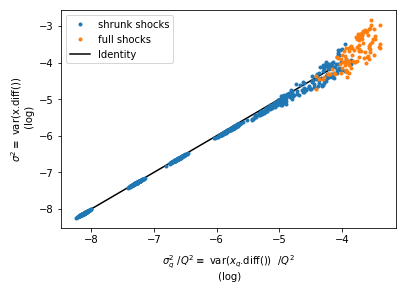

In [98]:
## Need to reframe for unbiased aggregate volatility

fig, ax = plt.subplots(1)
# fig, axs = plt.subplots(len(size_distributions), len(growth_rates), figsize = (18, 12))

size_distributions = ['pareto', 'logn90', 'logn']
growth_rates = ['emp_szd_T16_clip.8','emp_szd_T16', 'lapl', 'norm']

T = 16 - 1

# Particular case highlighted
for i, sizes in enumerate(['logn']):#, 'logn90', 'logn']):
#     for j, dist in enumerate(['emp_szd_T16_clip.8']):#, 'lapl', 'norm']):
    for j, dist in enumerate(['emp_szd_T16']):#, 'lapl', 'norm']):
#         result = full_data.loc[(full_data.sizes == sizes) & (full_data.dist == dist)]
        result = data2[2][0] # same but older version
#         result = result.loc[result.Q == 20]
        hvar = 'var_diff_qi'
        hvar0 = 'var_diff_q0'
        
        df = result.reset_index()
        df = df.drop(['var_agg_i','var_diff_agg_i'], axis = 1)
        
        q = 4   
        
        df_s_q = df.loc[(df.q == q)]
        points = df_s_q.sort_values(by = 'var_diff_qi')
        lin_vals = points[[str(t) for t in range(T + 1)]]
        rest_of_value = (points.Q - 1)*lin_vals.mean(1) # the value in Q-1 fixed quantiles
        value_sum = (lin_vals.T + rest_of_value.values).T
        points['var_diff_agg_i'] = np.log10(value_sum).diff(axis = 1).var(1)
        points['std_diff_agg_i'] = np.log10(value_sum).diff(axis = 1).std(1)
        
        
#         There should be something like...
        #         ## i experiment level
#         grouped = result.groupby(['dist', 'sizes', 's', 'Q', 'i'])
#         diff_agg = grouped[[str(t) for t in range(T + 1)]].apply(lambda x: np.log10(x.sum()).diff())#.tail(20).T.plot(legend = False)
#         bias_agg = pd.DataFrame(np.array((T + 1)*[-grouped['slope'].first().values]).T*range(T + 1))
#         bias_agg.columns = diff_agg.columns
#         bias_agg.index = diff_agg.index
#         df_agg = (diff_agg - bias_agg).var(1)
#         df_agg.name = 'var_diff_agg_i'

#         result = result.drop('var_diff_agg_i', axis = 1)
#         result = result.merge(df_agg.reset_index())
# #         agg var oneliner: result.groupby(['dist', 'sizes', 's', 'Q', 'i'])[[str(t) for t in range(T + 1)]].apply(lambda x: np.log10(x.sum()).diff().var())
# #         df_list += [df]
# # data3 = pd.concat(df_list)

        Q = 20
        points_Q = points.loc[(points.s != .5) & (points.Q == Q)]
        x = np.log10(points_Q.var_diff_qi / Q**2)
        y_var = np.log10(points_Q.var_diff_agg_i) # Remove the Q**2 to allow the fit in following cell to make sense. 
        ax.plot(x, y_var, marker = '.', lw = 0, label = 'shrunk shocks')
        
        points_Q = points.loc[(points.s == .5) & (points.Q == Q)]
        x = np.log10(points_Q.var_diff_qi / Q**2)
        y_var = np.log10(points_Q.var_diff_agg_i) # Remove the Q**2 to allow the fit in following cell to make sense. 
        ax.plot(x, y_var, marker = '.', lw = 0, label = 'full shocks')
        
ax.plot(range(-8, -3), range(-8, -3), label = 'Identity', c = 'k', zorder = -1)
ax.legend()
                
ax.set_xlabel(r'$\sigma^2_q \ /Q^2 \equiv$ var($x_q$.diff()) $\ /Q^2$'+'\n (log)')
ax.set_ylabel(r'$\sigma^2 \equiv$ var(x.diff())'+'\n (log)')
# Discuss everything that we learn here about the limit of small fluctuations.
plt.show()

## Now, plot

No handles with labels found to put in legend.
No handles with labels found to put in legend.


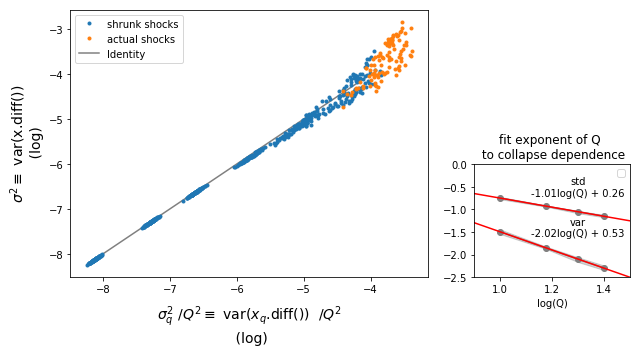

In [110]:
from matplotlib import gridspec

fig = plt.figure(figsize = (9, 5))
gs = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(gs[:, 0:2])
ax2 = plt.subplot(gs[1, 2])

ax = ax1

Q = 20
points_Q = points.loc[(points.s != .5) & (points.Q == Q)]
x = np.log10(points_Q.var_diff_qi / Q**2)
y_var = np.log10(points_Q.var_diff_agg_i) # Remove the Q**2 to allow the fit in following cell to make sense. 
ax.plot(x, y_var, marker = '.', lw = 0, label = 'shrunk shocks')

points_Q = points.loc[(points.s == .5) & (points.Q == Q)]
x = np.log10(points_Q.var_diff_qi / Q**2)
y_var = np.log10(points_Q.var_diff_agg_i) # Remove the Q**2 to allow the fit in following cell to make sense. 
ax.plot(x, y_var, marker = '.', lw = 0, label = 'actual shocks')
        
ax.plot(range(-8, -3), range(-8, -3), label = 'Identity', c = '.5', zorder = -1)
ax.legend()
                
ax.set_xlabel(r'$\sigma^2_q \ /Q^2 \equiv$ var($x_q$.diff()) $\ /Q^2$'+'\n (log)', fontsize = 14)
ax.set_ylabel(r'$\sigma^2 \equiv$ var(x.diff())'+'\n (log)', fontsize = 14)


ax = ax2

for option in [0, 1]:
    
    # plt.xscale('log')
    desc_data = desc_ord_Q.loc[option]
    x = desc_data.index
#     ax = axs[option]
    ax.fill_between(x, desc_data['25%'], desc_data['75%'], alpha = .35, color = '.5')
    ax.plot(x, desc_data['50%'], c=  '.5', marker = 'o', label = '_pooled obs. median')

    line = np.polyfit(x, desc_data['50%'], 1)

    x = np.arange(.9, 1.7, .1)
    ax.plot(x, line[0]*x + line[1], c = 'r', label = '_')
    ax.annotate(['var\n', 'std\n'][option] + str(line[0].round(2))+'log(Q) + '+str(line[1].round(2)), xy=(1.3, [-1.6, -.7][option]), ha="center", fontsize=10)

    ax.set_xlabel('log(Q)')
    ax.set_title('fit exponent of Q \n to collapse dependence')
    ax.set_xlim(.9, 1.5)
    ax.set_ylim(-2.5, 0)
    ax.legend()

plt.tight_layout()

plt.savefig('./../../../WRITING/paper1_writing/figures/quantile_sigma.png', dpi = 400)    
plt.show()

# Expectation of dependence of median

In [5]:
full_data = pd.read_csv('./../../data/processed/full_data_qi_var.csv')

In [6]:
### function: compute M cases of agregate volatility from the pool

In [7]:
def compute(x0_pool_part, M = 20):
    var_i_list = []
    var_diff_i_list = []
    for m in range(M):
        sim_m = x0_pool_part.groupby('q').apply(lambda x: x.sample())
        # sim_m['test'] = sim_m['var_diff_qi'] + sim_m['dev_median']

        value_sum = sim_m[[str(t) for t in range(T + 1)]].sum()
        # sim_m plays the role of df_i in the loops I was using before

        var_i = np.log10(value_sum).var() # we possibly want the var of logs.
        var_diff_i = np.log10(value_sum).diff().var() 
        var_i_list += [var_i]
        var_diff_i_list += [var_diff_i]
#     print('computed')
    return pd.DataFrame([var_i_list, var_diff_i_list], index = ['agg_var', 'agg_diff_var'])

In [8]:
# These files have the time evolution of Q, q, i quantiles.
# filename = './../../data/processed/exp_var_'+dist+'_1s_'+sizes+'.csv'

df_x0var_pool_l = []
T = 16 - 1
for i, sizes in enumerate(['pareto', 'logn90', 'logn']):
    for j, dist in enumerate(['emp_szd_T16_clip.8','emp_szd_T16', 'lapl', 'norm']):
        df = full_data.loc[(full_data.sizes == sizes) & (full_data.dist == dist)]
        
        hvar = 'var_diff_qi'
        hvar0 = 'var_diff_q0'
        
        df['dev_median'] = df.groupby(['s', 'Q', 'q'])[hvar].apply(lambda x: abs(x - x.median()))
        df_x0var_pool = df.groupby(['s', 'Q', 'q']).apply(lambda x: x.nsmallest(2, 'dev_median').reset_index(drop = True))

        # When we isolated cases i from their original experiment, they must not carry the aggregate 'y' anymore.
        df_x0var_pool = df_x0var_pool.drop(['var_agg_i', 'var_diff_agg_i'], axis = 1)
        # They will be redefined for any mix of qi time series.
        df_x0var_pool_l += [df_x0var_pool]
        
x0_pool = pd.concat(df_x0var_pool_l).reset_index(drop = True)



In [9]:
print(len(x0_pool[['sizes', 'dist', 's', 'Q']].drop_duplicates()))
median_y = x0_pool.groupby(['sizes', 'dist', 's', 'Q']).apply(lambda x: compute(x))

336


In [10]:
# ['#1f77b4',
#  '#ff7f0e',
#  '#2ca02c',
#  '#d62728',
#  '#9467bd',
#  '#8c564b',
#  '#e377c2',
#  '#7f7f7f',
#  '#bcbd22',
#  '#17becf']

In [11]:
describe = median_y.T.describe().T

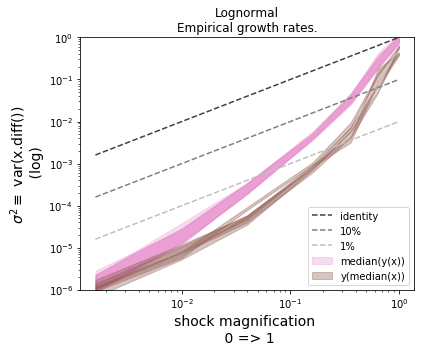

In [12]:
# There should not be a dependence with Q.
# Let's see the dependence with s.

fig, ax = plt.subplots(1, figsize = (6, 5))

for j, sizes in enumerate(['logn']):
    for k, dist in enumerate(['emp_szd_T16_clip.8']):
#     for k, dist in enumerate(['emp_szd_T16_clip.8','emp_szd_T16', 'lapl', 'norm']):
        result = full_data.loc[(full_data.sizes == sizes) & (full_data.dist == dist)]

#         ax.set_title(sizes +', '+ dist)
        ax.set_title('Lognormal\nEmpirical growth rates.')

                # median(y(x))
        df = result.set_index(['Q', 's', 'i'])

        data_plot = df.groupby(level = ['Q','s'])['var_agg_i'].describe()

        for Q in [10, 15, 20, 25]:
            data_plotQ = data_plot.loc[Q]
            x = (data_plotQ.index)**2
            ax.fill_between(4*x, data_plotQ['25%'], data_plotQ['75%'], alpha = .25, label = 'median(y(x))' if Q == 10 else '_', color = '#e377c2') # label = str(Q)

            
        # y(median(x))
        data = describe.loc[sizes].loc[dist]
        data = data.reset_index()
        for Q in [10, 15, 20, 25]:
            dataQ = data.loc[data.Q == Q]
            dataQ = dataQ.set_index(['s', 'level_2'])[['25%','50%','75%']].unstack()
            dataQ.columns = dataQ.columns.swaplevel()

            data_plot = dataQ['agg_diff_var']
            
            x = (data_plot.index)**2 # express it in terms of individual variance, not std
            ax.fill_between(4*x, data_plot['25%'], data_plot['75%'], alpha = .35, label = 'y(median(x))' if Q == 10 else '_', color = '#8c564b')
            

        
ax.plot(4*x, 4*x, c=  '.25', label = 'identity', linestyle = '--')
ax.plot(4*x, 4*x/10, c=  '.5', label = '10%', linestyle = '--')
ax.plot(4*x, 4*x/100, c=  '.75', label = '1%', linestyle = '--')

ax.set_xlabel('shock magnification \n 0 => 1', fontsize = 14)
ax.set_ylabel(r'$\sigma^2 \equiv$ var(x.diff())'+'\n (log)', fontsize = 14)
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-6, 1)
plt.tight_layout()
plt.savefig('./../../../WRITING/paper1_writing/figures/median_y.png', dpi = 300)
plt.show()
                

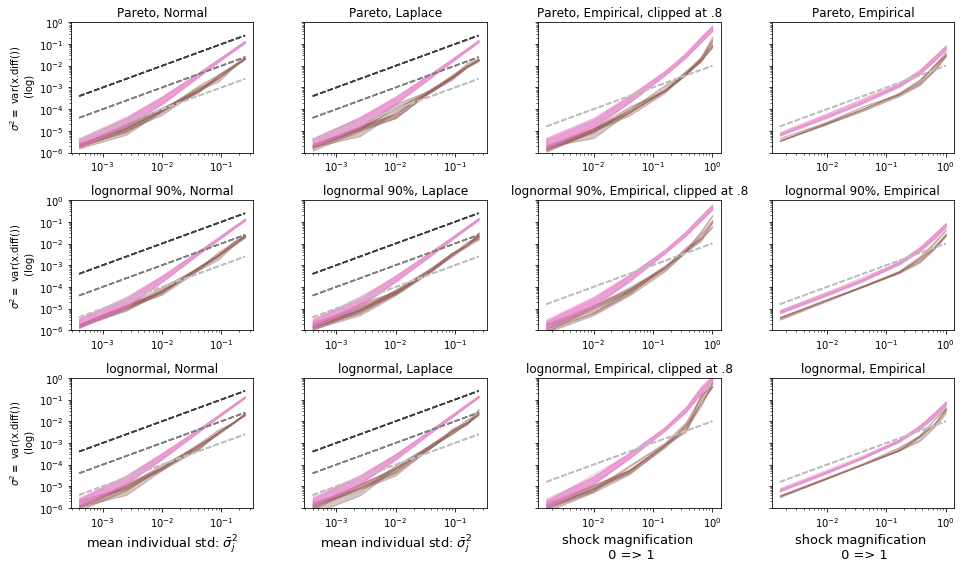

In [13]:
# There should not be a dependence with Q.
# Let's see the dependence with s.


size_distributions = ['pareto', 'logn90', 'logn']
growth_rates = ['norm', 'lapl', 'emp_szd_T16_clip.8','emp_szd_T16']

fig, axs = plt.subplots(len(size_distributions), len(growth_rates), figsize = (4.5*len(size_distributions), 2*len(growth_rates)), sharey = True)
#             result = full_data.loc[(full_data.sizes == sizes) & (full_data.dist == dist)]
#         result = result.loc[result.Q == Q]
        
for j, sizes in enumerate(size_distributions):
    for k, dist in enumerate(growth_rates):
        ax = axs[j][k]
        ax.set_title(['Pareto', 'lognormal 90%', 'lognormal'][j] + ', ' +
                    ['Normal', 'Laplace', 'Empirical, clipped at .8', 'Empirical'][k])
        # y(median(x))        
        data = describe.loc[sizes].loc[dist]
        data = data.reset_index()
        for Q in [10, 15, 20, 25]:
            dataQ = data.loc[data.Q == Q]
            dataQ = dataQ.set_index(['s', 'level_2'])[['25%','50%','75%']].unstack()
            dataQ.columns = dataQ.columns.swaplevel()

            data_plot = dataQ['agg_diff_var']
            
            x = (data_plot.index)**2 # express it in terms of individual variance, not std
            if dist[:3] == 'emp': x = 4*x
            ax.fill_between(x, data_plot['25%'], data_plot['75%'], alpha = .35, label = str((sizes, dist, Q)), color = '#8c564b')
            if dist[:3] != 'emp': ax.plot(x, x, c=  '.25', label = 'identity', linestyle = '--')
            if dist[:3] != 'emp': ax.plot(x, x/10, c=  '.5', label = '10%', linestyle = '--')
            ax.plot(x, x/100, c=  '.75', label = '1%', linestyle = '--') # in the case of empiricals, it's just a 'linearity guide'.
            
            
        # median(y(x))
        result = full_data.loc[(full_data.sizes == sizes) & (full_data.dist == dist)]
        df = result.set_index(['Q', 's', 'i'])

        data_plot = df.groupby(level = ['Q','s'])['var_agg_i'].describe()

        for Q in [10, 15, 20, 25]:
            data_plotQ = data_plot.loc[Q]
            x = (data_plotQ.index)**2
            if dist[:3] == 'emp': x = 4*x
            ax.fill_between(x, data_plotQ['25%'], data_plotQ['75%'], alpha = .25, label = str((sizes, dist, Q)), color = '#e377c2')

#             ax.plot(x, x**(1.3), c=  '.75', label = '_')
        ax.set_xscale('log')
        ax.set_yscale('log')

        ax.set_ylim(1e-6, 1)
        
        if k == 0: 
            ax.set_ylabel(r'$\sigma^2 \equiv$ var(x.diff())'+'\n (log)')
            

        if j == len(size_distributions) - 1:
            
            if k > 1: 
                ax.set_xlabel('shock magnification \n 0 => 1', fontsize = 13)
            else:
                ax.set_xlabel('mean individual std: '+ r'$\bar \sigma^2_j$', fontsize = 13)

plt.tight_layout()
plt.savefig('./../../../WRITING/paper1_writing/figures/median_y_supplement.png', dpi = 250)
plt.show()

# # For the empirical grs, if we want to know the actual individual level std, this is:

# 0.49*s for pareto and logn90
# 0.80*s for logn

# do (k*s)**2 for variance
                

In [14]:
def log_var(df):
    value_sum = df[[str(t) for t in range(T + 1)]].sum()
    return np.log10(value_sum).var()

def log_diff_var(df):
    value_sum = df[[str(t) for t in range(T + 1)]].sum()
    return np.log10(value_sum).diff().var()
    

In [22]:
df_x0var_pool_l = []
for i, sizes in enumerate(['pareto', 'logn90', 'logn']):
    for j, dist in enumerate(['emp_szd_T16','emp_szd_T16_clip.8', 'lapl', 'norm']):
        df = full_data.loc[(full_data.sizes == sizes) & (full_data.dist == dist)]
#         df = data2[i][j]
        
        hvar = 'var_diff_qi'
        hvar0 = 'var_diff_q0'
        
        df['dev_median'] = df.groupby(['s', 'Q', 'q'])[hvar].apply(lambda x: abs(x - x.median()))
        df_x0var_pool = df.groupby(['s', 'Q', 'q']).apply(lambda x: x.nsmallest(2, 'dev_median').reset_index(drop = True))

        # When we isolated cases i from their original experiment, they must not carry the aggregate 'y' anymore.
        df_x0var_pool = df_x0var_pool.drop(['var_agg_i', 'var_diff_agg_i'], axis = 1)
        # They will be redefined for any mix of qi time series.
        df_x0var_pool_l += [df_x0var_pool]
        
x0_pool = pd.concat(df_x0var_pool_l).reset_index(drop = True)

In [23]:
# df_x0var_pool tiene n casos cercanos a la media de cada q
result_log = []
for i, sizes in enumerate(['pareto', 'logn90', 'logn']):
    for j, dist in enumerate(['emp_szd_T16', 'emp_szd_T16_clip.8', 'lapl', 'norm']):
        print(sizes, dist)
#         df = data2[i][j]
        df = full_data.loc[(full_data.sizes == sizes) & (full_data.dist == dist)]

        
        x0_pool_part = x0_pool.loc[(x0_pool.dist == dist) & (x0_pool.sizes == sizes)]
        x0_pool_part = x0_pool_part.sort_values(by = ['s', 'Q', 'q', 'i'])

        for Q in x0_pool_part.Q.unique():
            for s in x0_pool_part.s.unique():
                print(Q, s)
                x0_pool_part_Qs = x0_pool_part.loc[(x0_pool_part.Q == Q) & (x0_pool_part.s == s)]

                # for m in range(10):
                sim_x0_m = x0_pool_part_Qs.groupby('q').apply(lambda x: x.sample()).reset_index(drop =  True) # I take one and leave it fixed

                m = 60
                sim_x0 = pd.concat(m*[sim_x0_m])
                sim_x0['m'] = np.sort(Q*list(range(m)))
                sim_x0.head()

                df_part = df.loc[(df.Q == Q) & (df.s == s)]

                q_results = []
                for q in range(Q):
                    # Experiment
                    pts = df_part.loc[df_part.q == q].sample(m).sort_values(by = 'var_diff_qi')
                    pts = pts.drop(['var_agg_i','var_diff_agg_i'], axis = 1)
                    pts['m'] = range(m)

                    sim_xq = pd.concat([sim_x0, pts])
                    sim_xq = sim_xq.groupby(['s', 'Q', 'q', 'm']).last() # This one has many different linear time series in quantile q. All other quantiles are constant.

                    pts['var_agg_i'] = sim_xq.groupby(level = ['s', 'Q', 'm']).apply(lambda x: log_var(x)).values
                    pts['var_diff_agg_i'] = sim_xq.groupby(level = ['s', 'Q', 'm']).apply(lambda x: log_diff_var(x)).values
                    
                    pts['log_var_diff_qi'] = np.log10(pts['var_diff_qi'])
                    pts['log_var_diff_agg_i'] = np.log10(pts['var_diff_agg_i'])
                    q_results += [pts]
                exp_result = pd.concat(q_results)

                # Summarise xy partial dependence
                x_fit = 'log_var_diff_qi'
                y_fit = 'log_var_diff_agg_i'

                grouped = exp_result.groupby(['s', 'Q','q'])
                partial_dep_result = grouped[[x_fit, y_fit]].std().rename(columns = {x_fit: 'sx', y_fit: 'sy'})
                partial_dep_result['corr'] = grouped.apply(lambda x: np.corrcoef(x[x_fit], x[y_fit])[1, 0])
                partial_dep_result['alpha'] = grouped.apply(lambda x: np.polyfit(x[x_fit], x[y_fit], 1)[0])
                #log alpha is log_res.sy - log_res.sx + log_res['corr']              
                
                log_partial_dep = np.log10(partial_dep_result)
                log_partial_dep['dist'] = dist
                log_partial_dep['sizes'] = sizes
                result_log += [log_partial_dep]

pareto emp_szd_T16
10 0.02
10 0.05
10 0.1
10 0.2
10 0.3
10 0.4
10 0.5
15 0.02
15 0.05
15 0.1
15 0.2
15 0.3
15 0.4
15 0.5
20 0.02
20 0.05
20 0.1
20 0.2
20 0.3
20 0.4
20 0.5
25 0.02
25 0.05
25 0.1
25 0.2
25 0.3
25 0.4
25 0.5
pareto emp_szd_T16_clip.8
10 0.02
10 0.05
10 0.1
10 0.2
10 0.3
10 0.4
10 0.5
15 0.02
15 0.05
15 0.1
15 0.2
15 0.3
15 0.4
15 0.5
20 0.02
20 0.05
20 0.1
20 0.2
20 0.3
20 0.4
20 0.5
25 0.02
25 0.05
25 0.1
25 0.2
25 0.3
25 0.4
25 0.5
pareto lapl
10 0.02
10 0.05
10 0.1
10 0.2
10 0.3
10 0.4
10 0.5
15 0.02
15 0.05
15 0.1
15 0.2
15 0.3
15 0.4
15 0.5
20 0.02
20 0.05
20 0.1
20 0.2
20 0.3
20 0.4
20 0.5
25 0.02
25 0.05
25 0.1
25 0.2
25 0.3
25 0.4
25 0.5
pareto norm
10 0.02
10 0.05
10 0.1
10 0.2
10 0.3
10 0.4
10 0.5
15 0.02
15 0.05
15 0.1
15 0.2
15 0.3
15 0.4
15 0.5
20 0.02
20 0.05
20 0.1
20 0.2
20 0.3
20 0.4
20 0.5
25 0.02
25 0.05
25 0.1
25 0.2
25 0.3
25 0.4
25 0.5
logn90 emp_szd_T16
10 0.02
10 0.05
10 0.1
10 0.2
10 0.3
10 0.4
10 0.5
15 0.02
15 0.05
15 0.1
15 0.2
15 0.3
15 0.4
1

In [24]:
# exp_result.plot('var_diff_qi', 'var_diff_agg_i', marker = '.', lw = 0, alpha = .1)
# # plt.xlim(0, )
# # plt.ylim(0, )
# plt.xscale('log')
# plt.yscale('log')

In [25]:
result_log_df = pd.concat(result_log)
result_log_df.to_csv('./../../data/processed/slopes_log_sigmas_nonbias.csv')

In [26]:
# result_log_df = pd.concat(result_log)
# result_log_df.to_csv('./../../data/processed/slopes.csv')

In [27]:
# Plot direct dependence
# (exp_result.reset_index()[['var_diff_qi', 'var_diff_agg_i']]).plot(marker = '.', lw = 0, alpha = .4)
# plt.yscale('log')

In [32]:
## Load results

# result_log_df = pd.read_csv('./../../data/processed/slopes_log_sigmas.csv')
result_log_df = pd.read_csv('./../../data/processed/slopes_log_sigmas_nonbias.csv', index_col=[0,1,2])

In [33]:
result_log_df['sx.alpha'] = result_log_df['alpha'] + result_log_df['sx']

pareto emp_szd_T16_clip.8


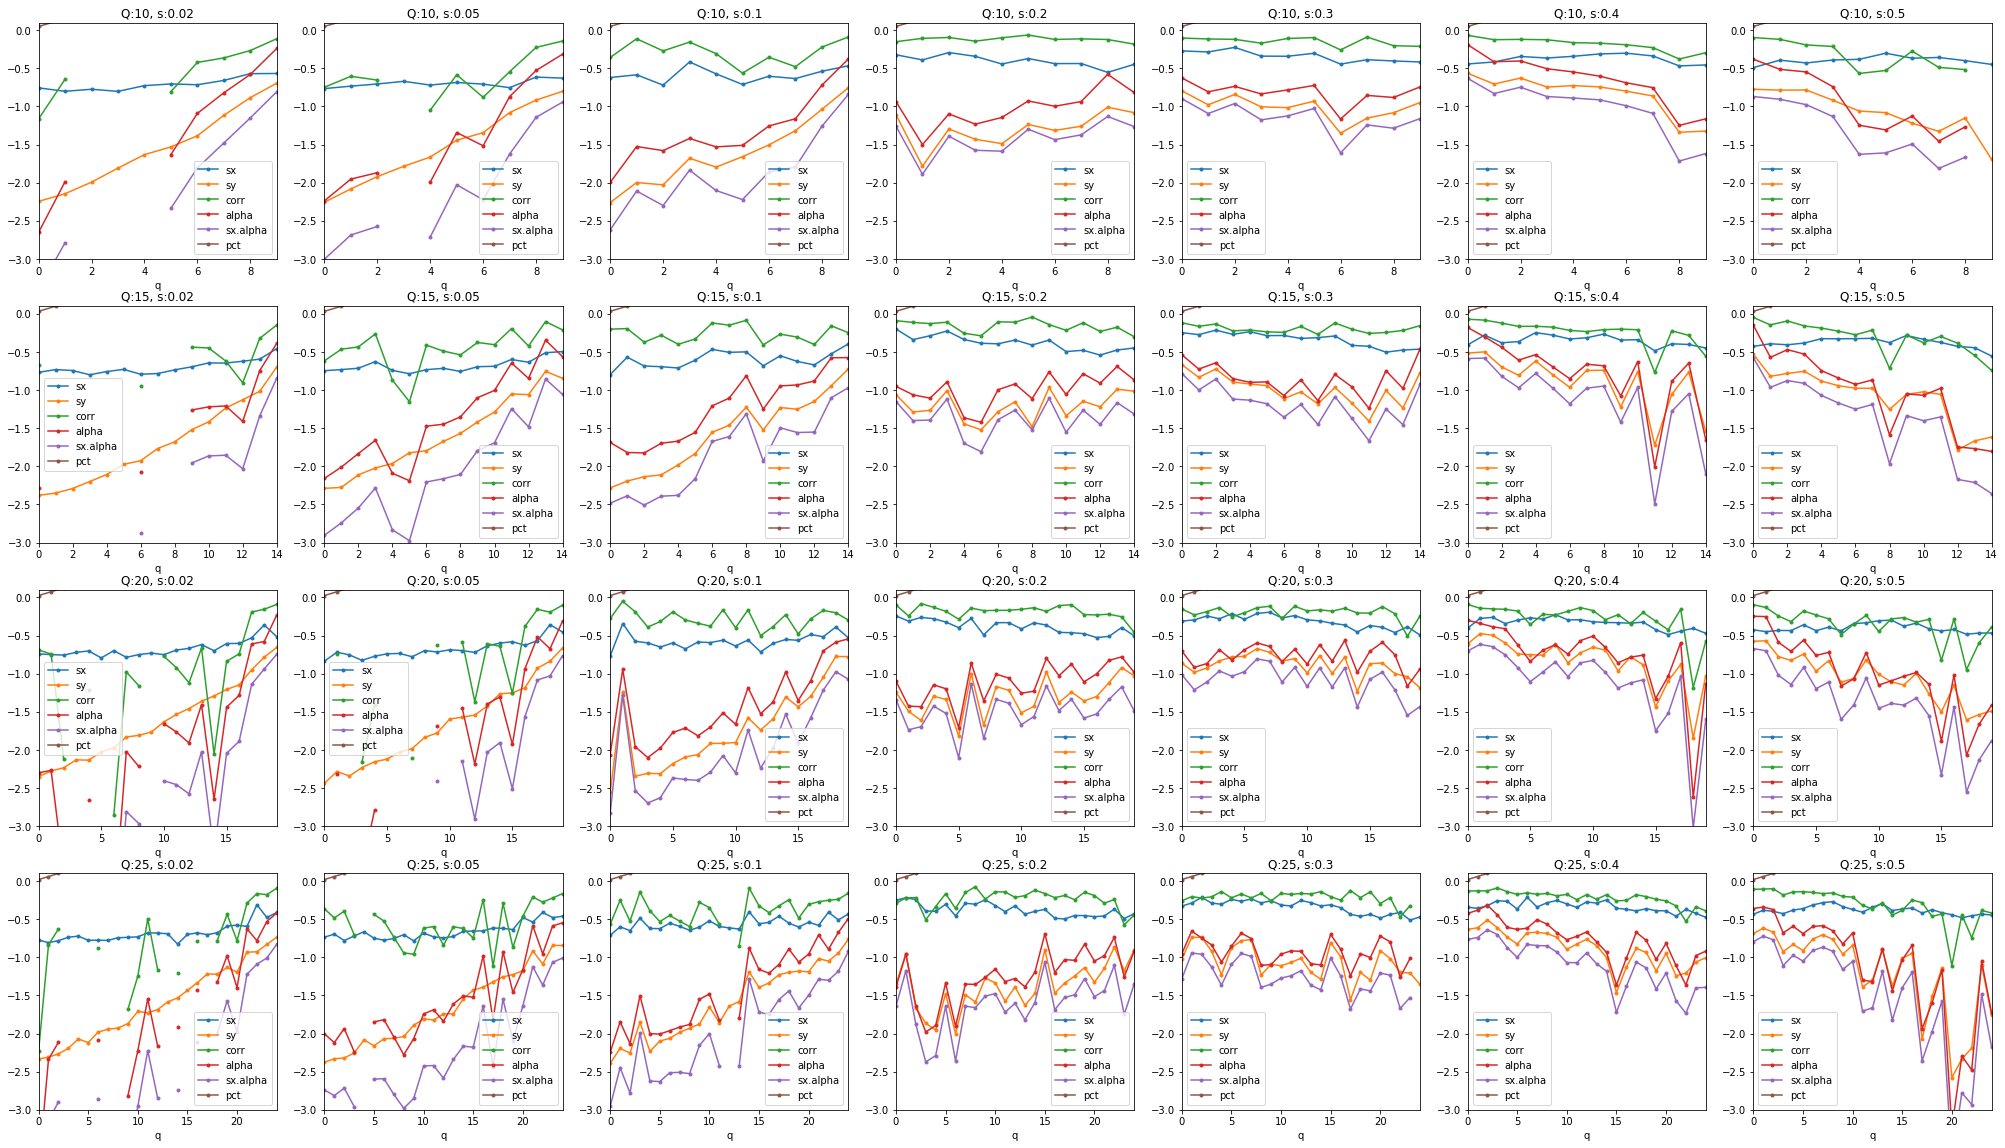

pareto emp_szd_T16


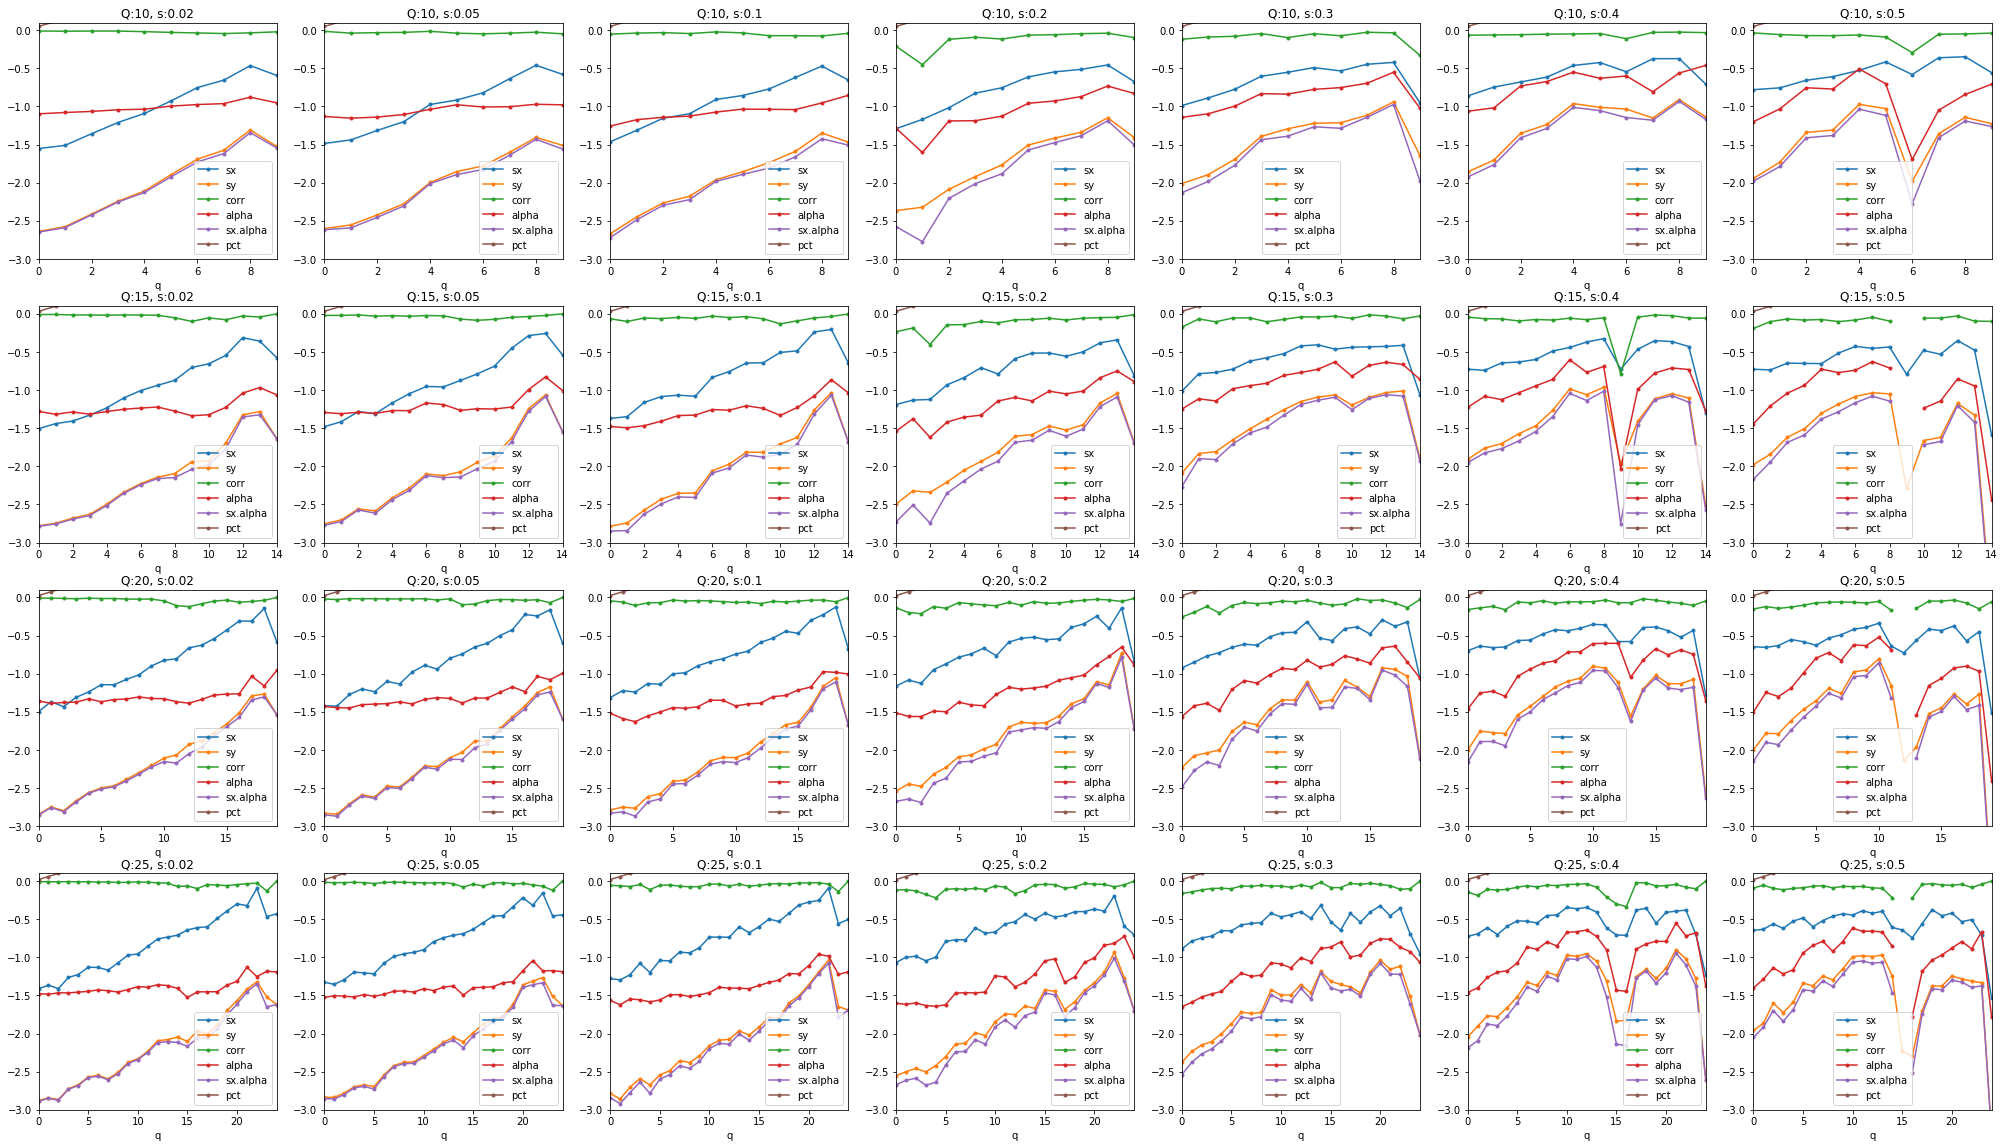

logn90 emp_szd_T16_clip.8


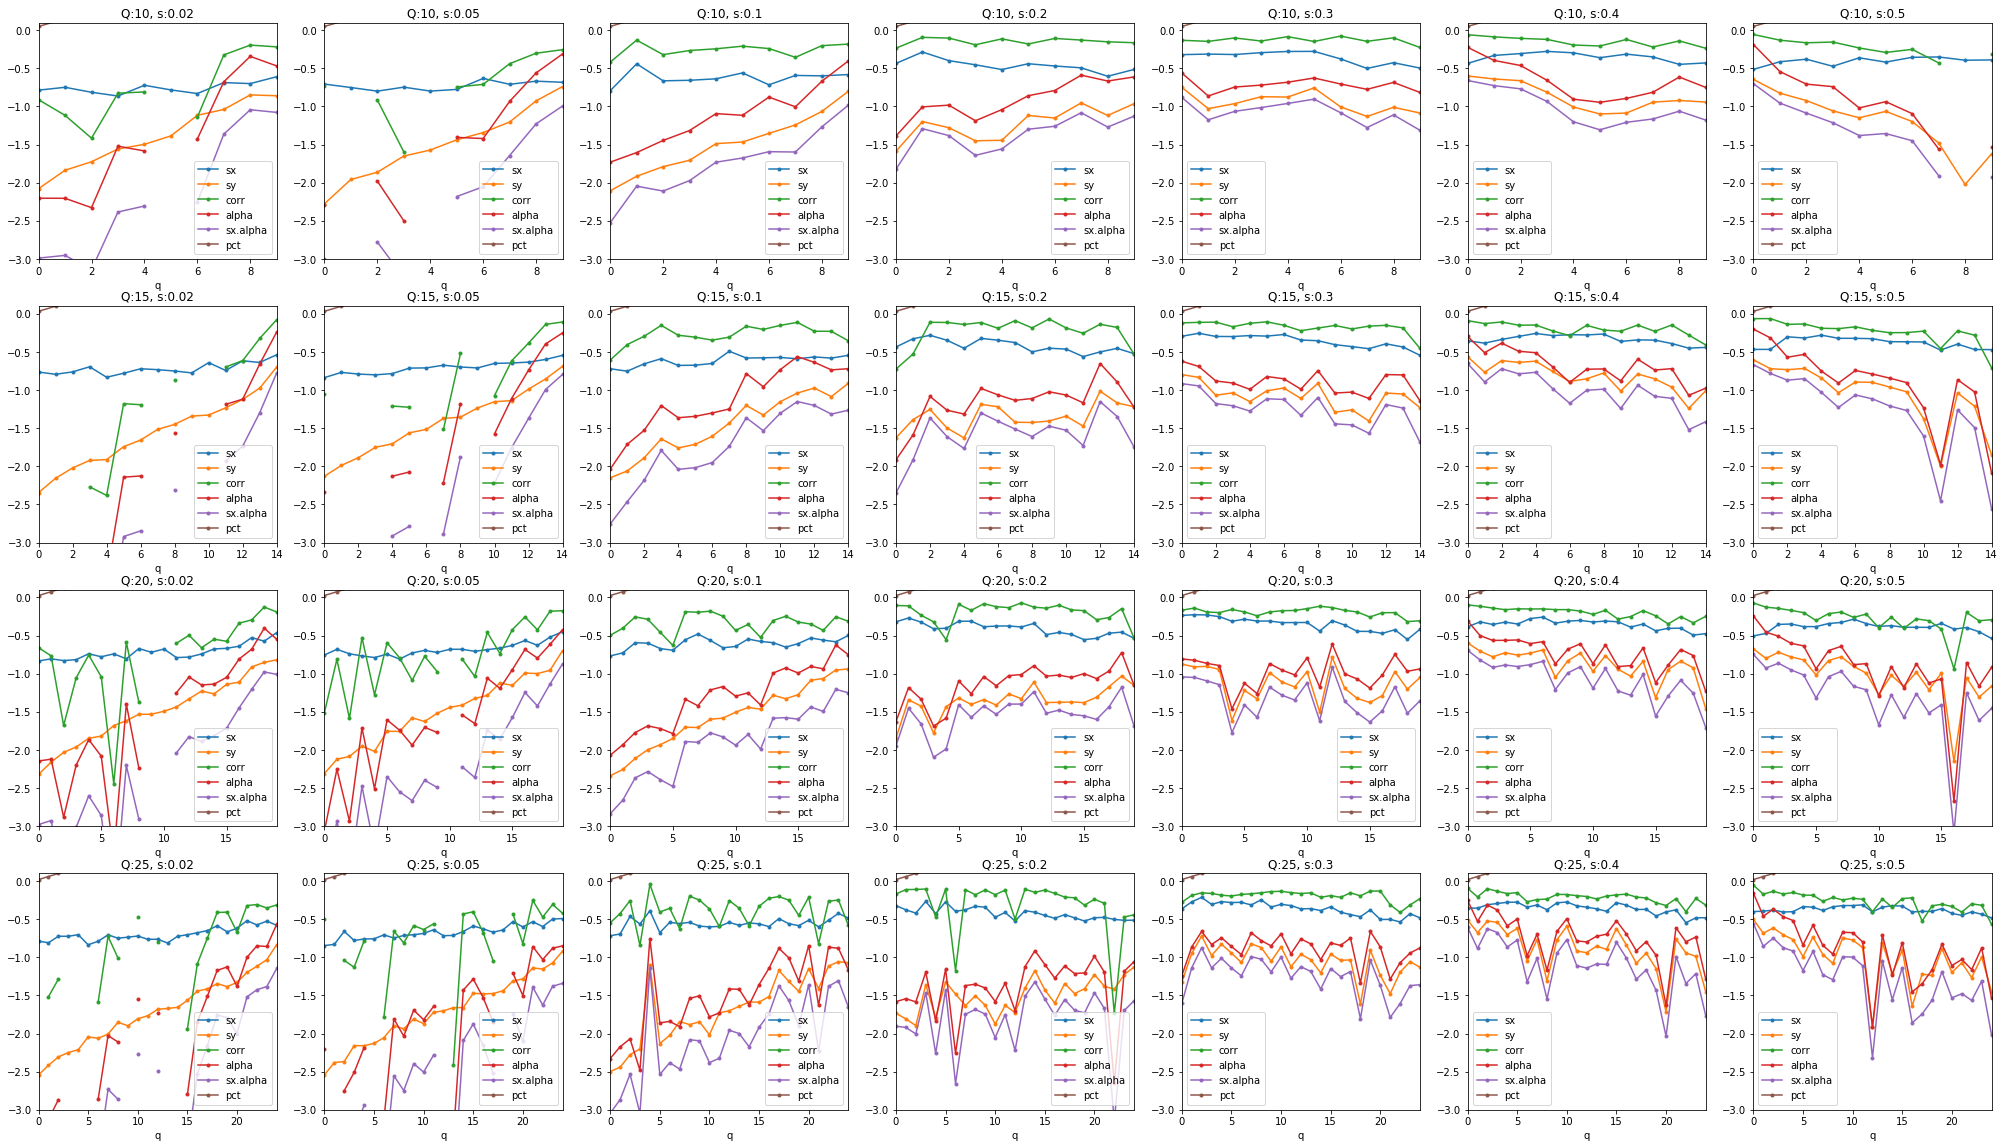

logn90 emp_szd_T16


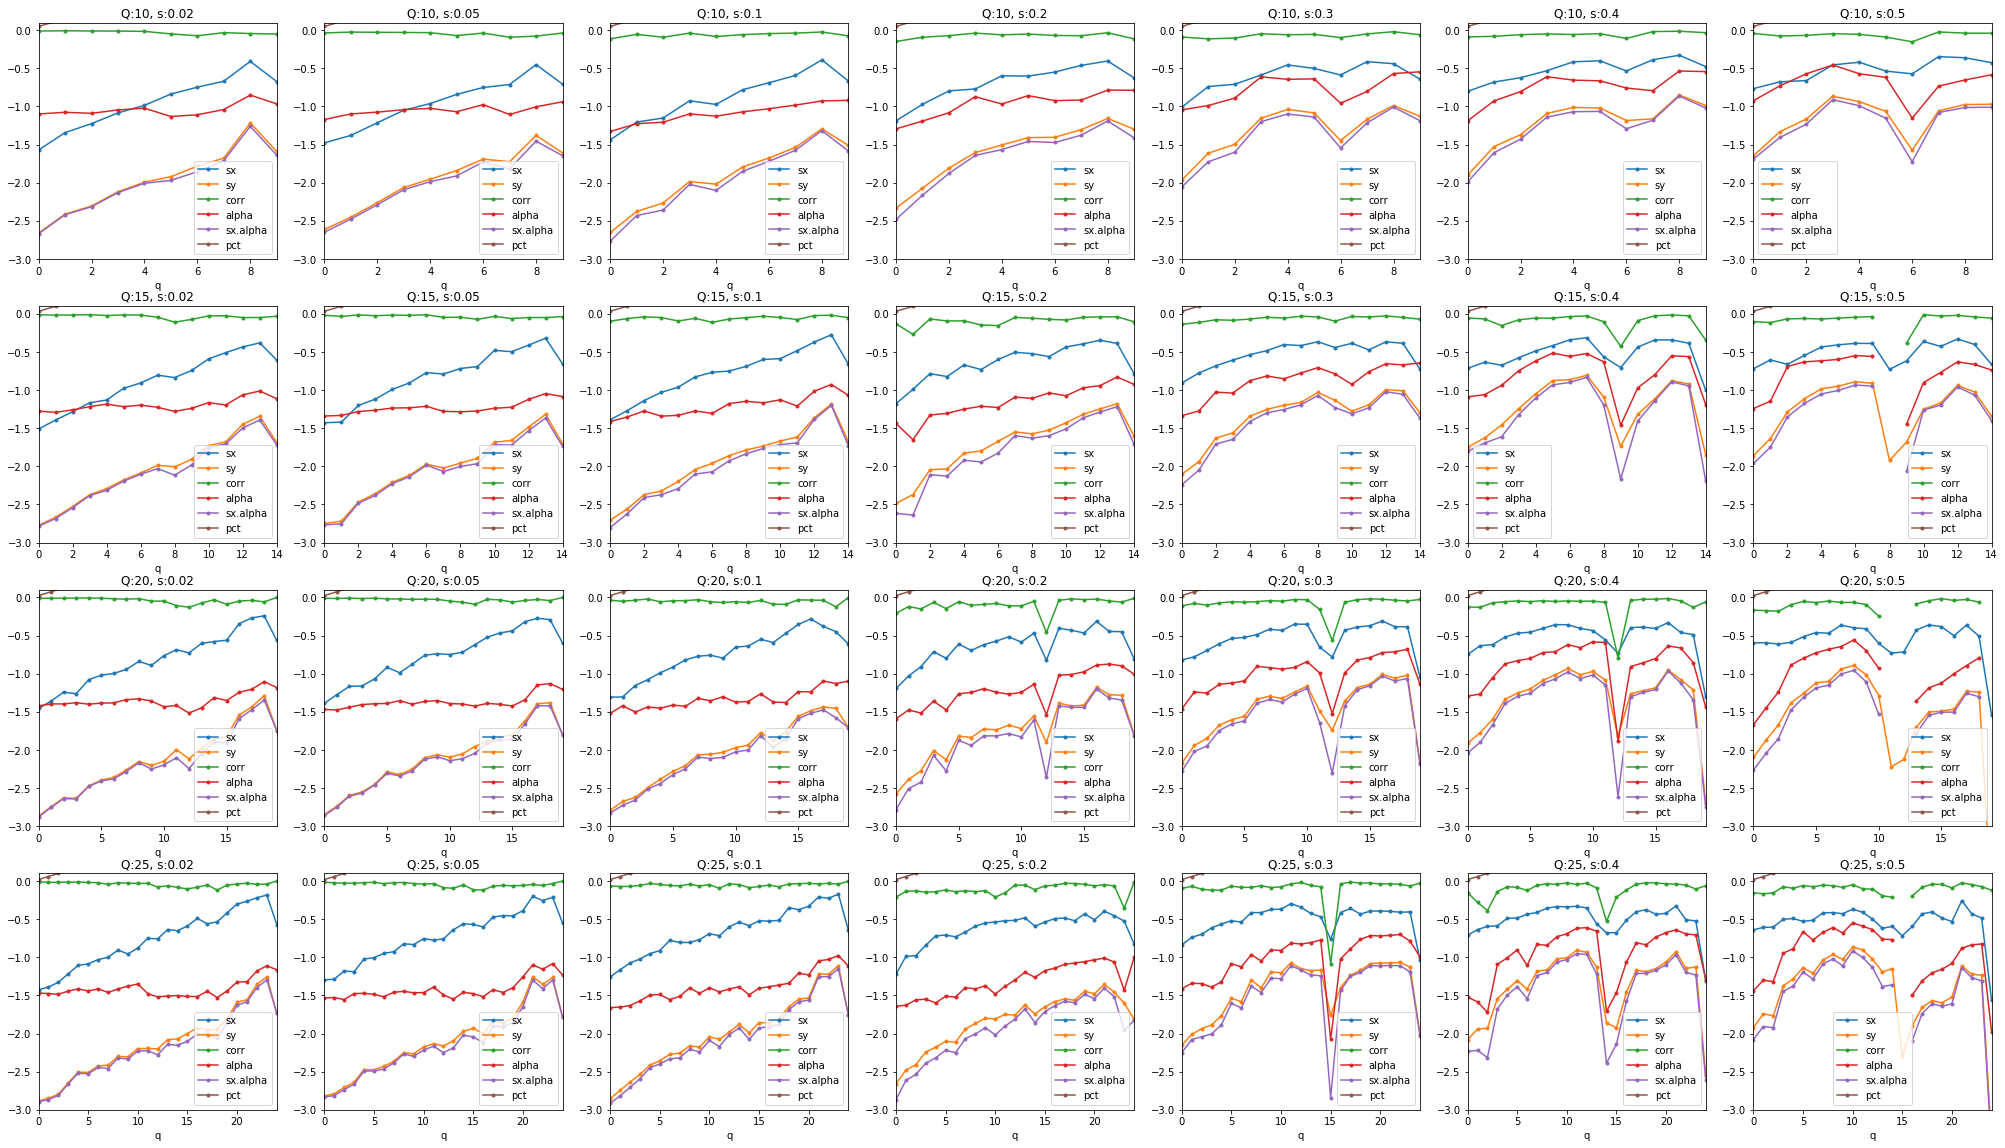

logn emp_szd_T16_clip.8


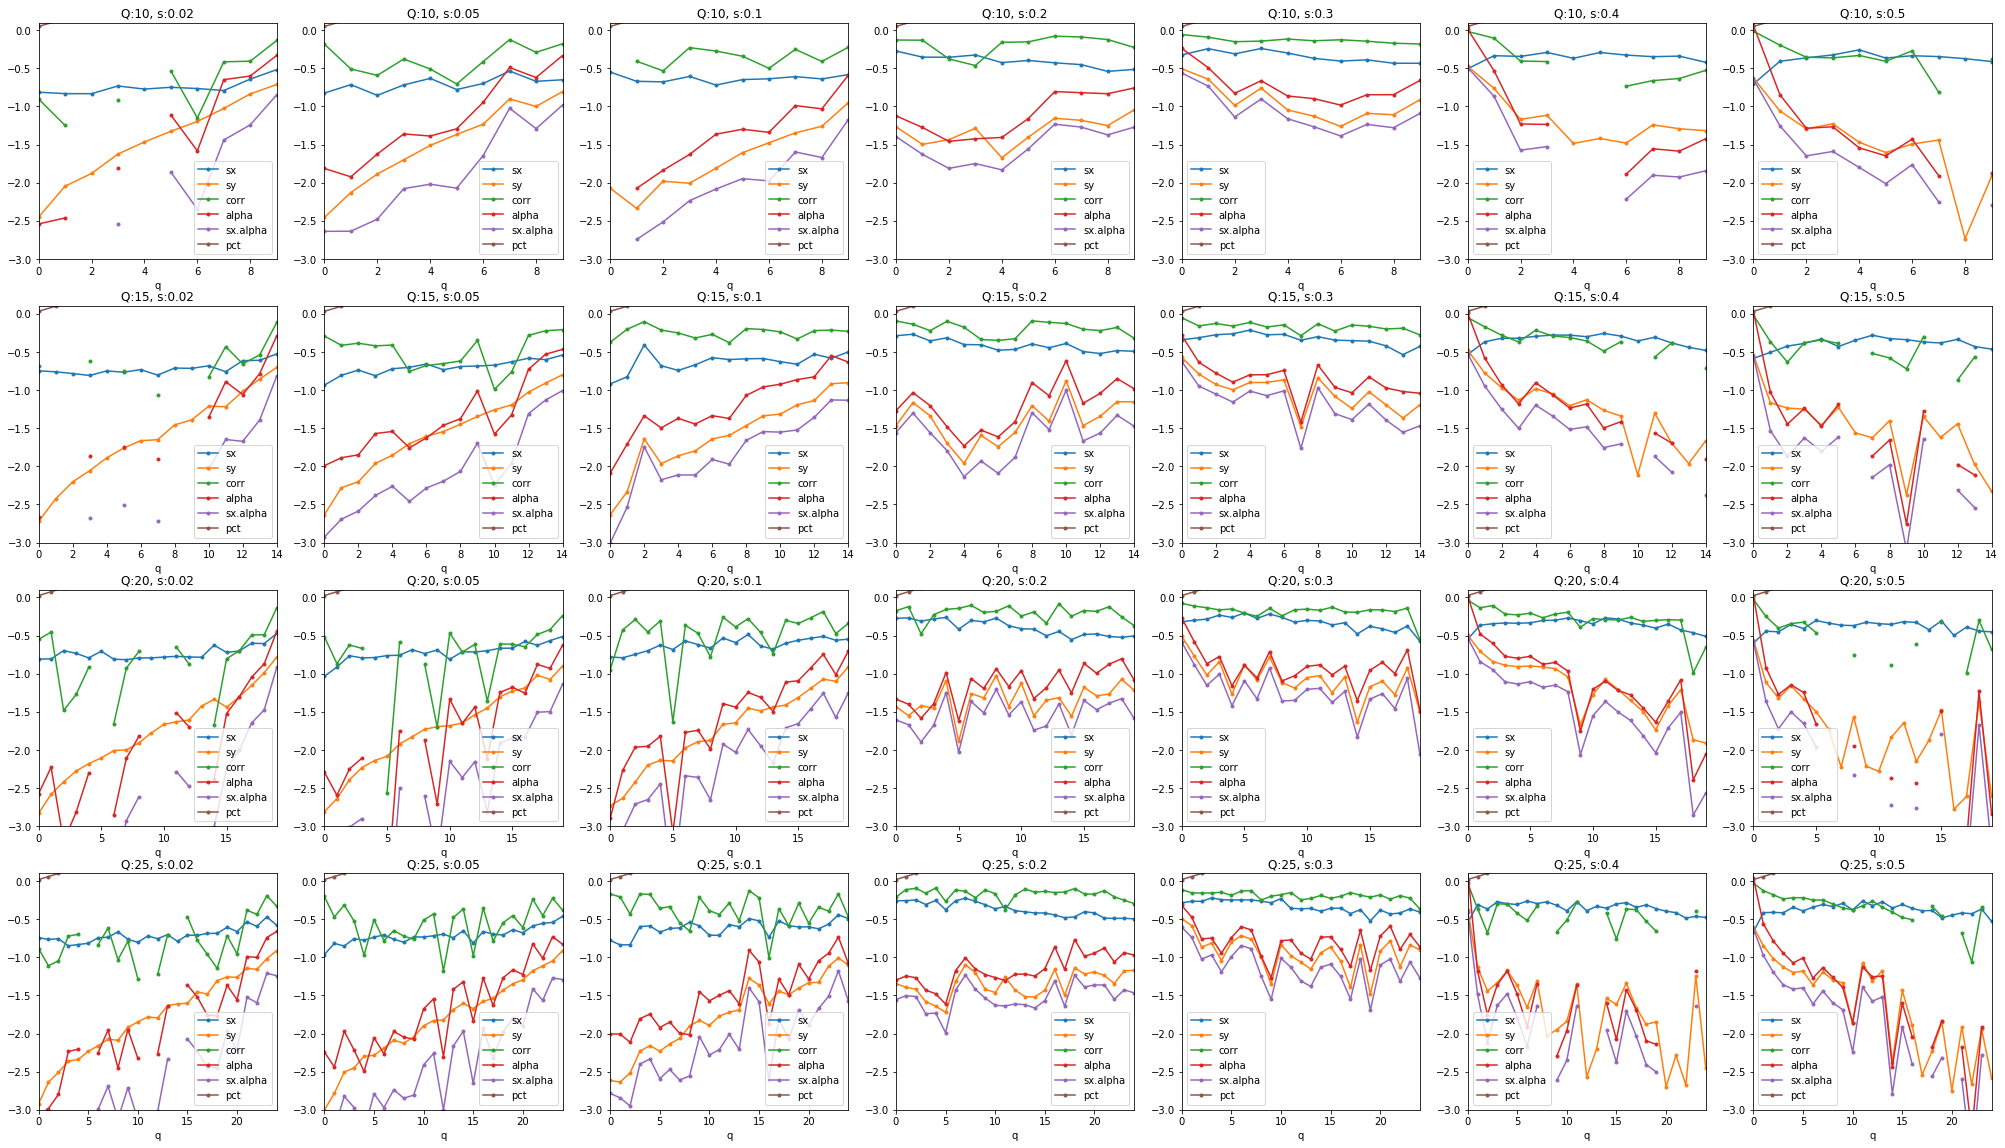

logn emp_szd_T16


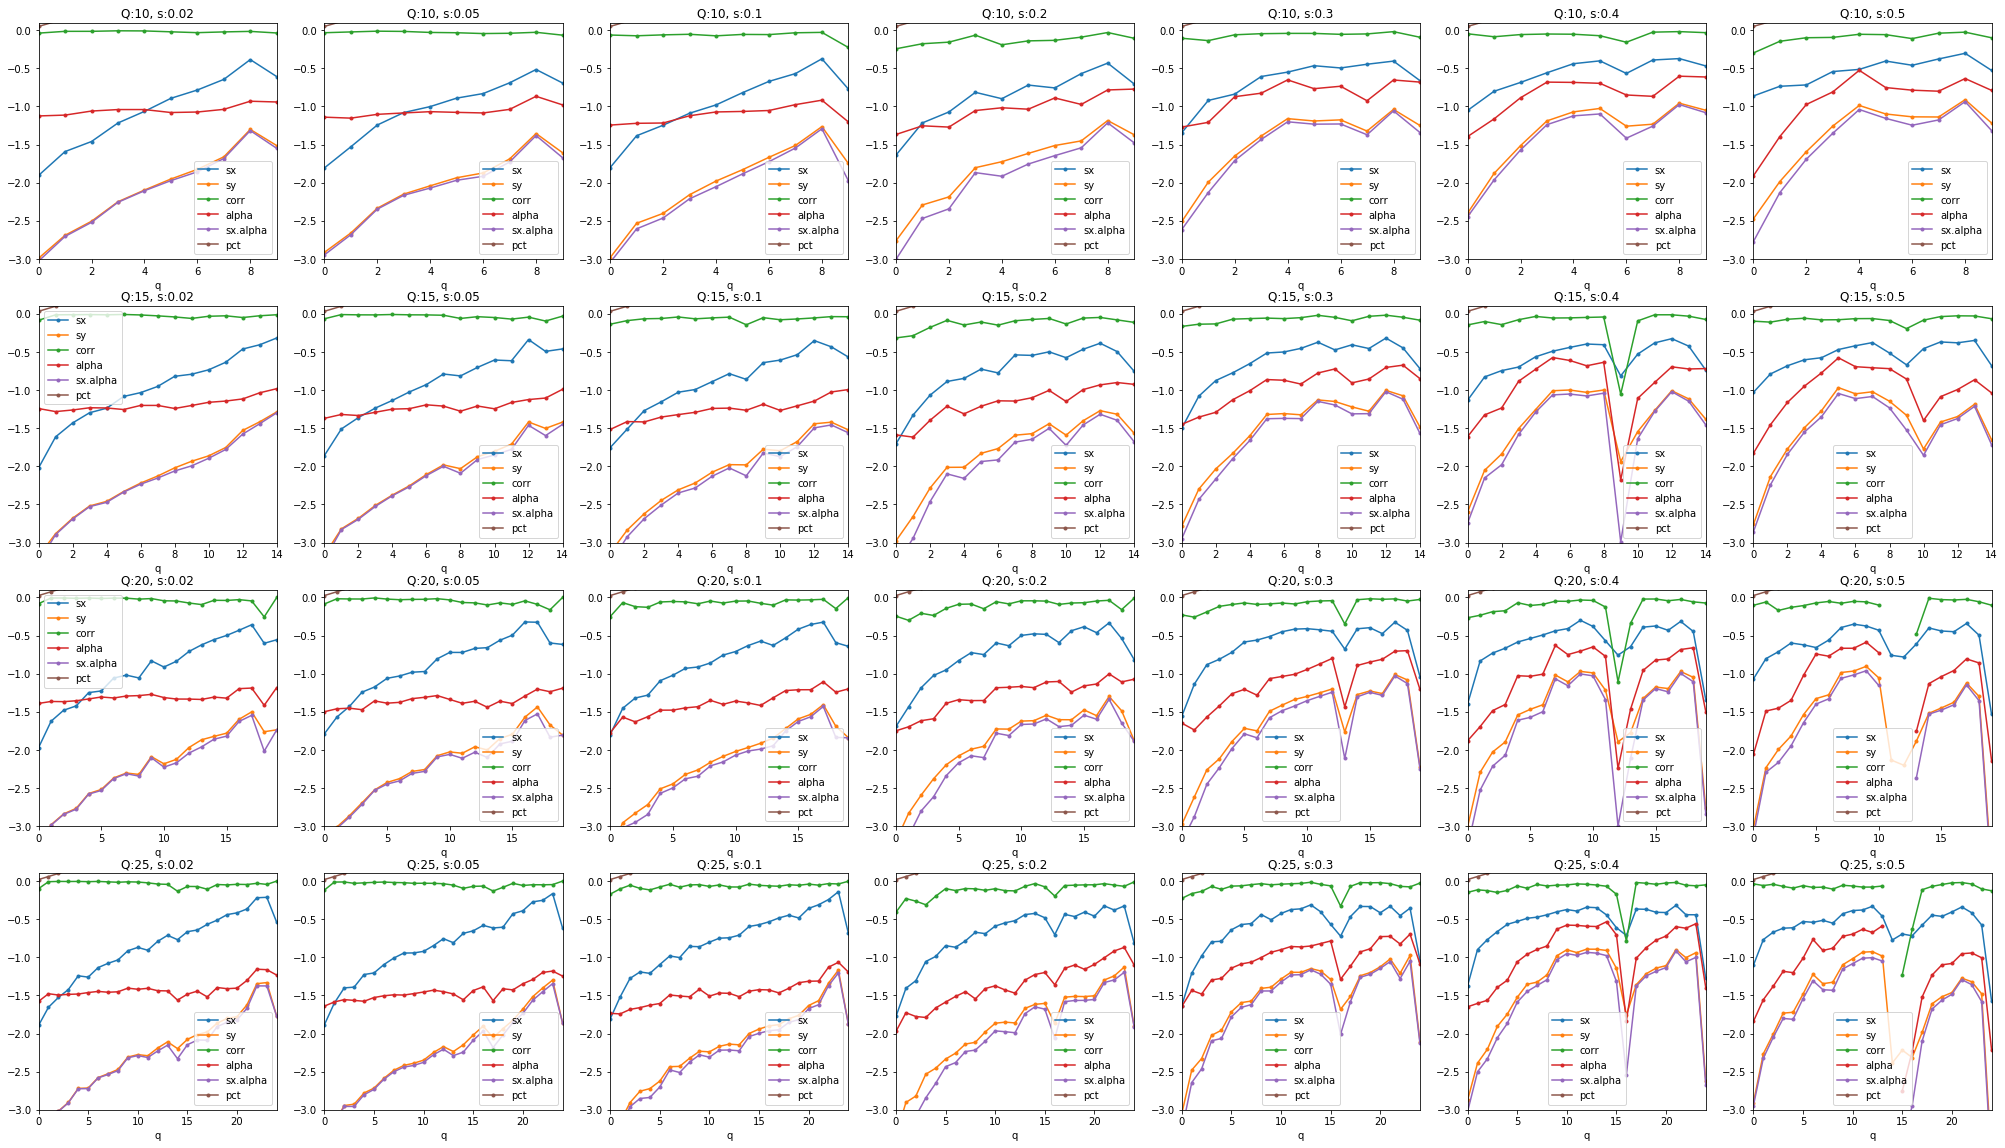

In [44]:
for i, sizes in enumerate(['pareto', 'logn90', 'logn']):
    for j, dist in enumerate(['emp_szd_T16_clip.8','emp_szd_T16']):#, 'lapl', 'norm']):
        Qs = result_log_df.index.get_level_values('Q').unique()
        Ss = result_log_df.index.get_level_values('s').unique()
        result_log_df_part = result_log_df.loc[(result_log_df.dist == dist) & (result_log_df.sizes == sizes)]
        print(sizes, dist)
        fig, axs = plt.subplots(len(Qs), len(Ss), figsize = (len(Ss)*5, len(Qs)*5))
        for k, Q_ in enumerate(Qs):
            for l, s in enumerate(Ss):
                ax = axs[k][l]
                result_log_df_part.loc[s].loc[Q_].plot(marker = '.', ax = ax)
                ax.set_title('Q:'+str(Q_)+', s:'+str(s))
                ax.set_ylim(-3, 0.1)
        plt.show()

In [39]:
result_log_df['pct'] = (result_log_df.index.get_level_values('q') + .5)/result_log_df.index.get_level_values('Q')

def fit(df_):
    slopes = []
    try:
        for col in ['sx','sy','corr','alpha']:
            line = np.polyfit(df_['pct'], df_[col], 1)
            slopes += [line[0]]
        fit_df = pd.DataFrame(np.array(slopes), index = ['slope_'+label for label in ['sx','sy','corr','alpha']])
    except:
        fit_df = None
    return fit_df

# fit_result = result_log_df.groupby(['dist', 'sizes','Q', 's']).apply(lambda x: fit(x))
fit_result = result_log_df.loc[result_log_df.dist == 'emp_szd_T16'].groupby(['dist', 'sizes','Q', 's']).apply(lambda x: fit(x))

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 9 Text xticklabel objects>)

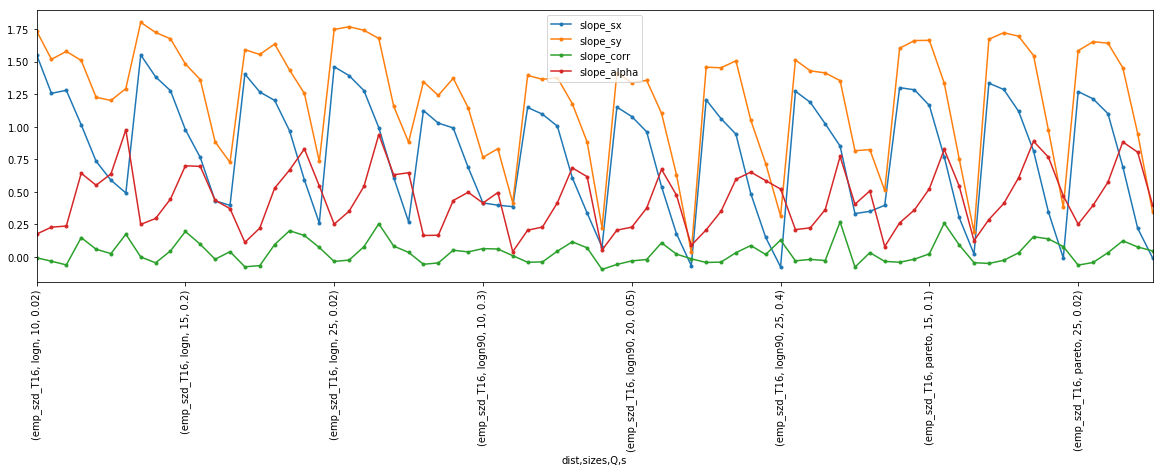

In [40]:
fig, ax = plt.subplots(1, figsize = (20, 5))
fit_result.unstack()[0].plot(ax = ax, marker = '.')
plt.xticks(rotation=90)

In [41]:
# Fit dependence on q, let add a constant by s and another by Q

# result_log_df.loc[result_log_df]

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 <a list of 10 Text xticklabel objects>)

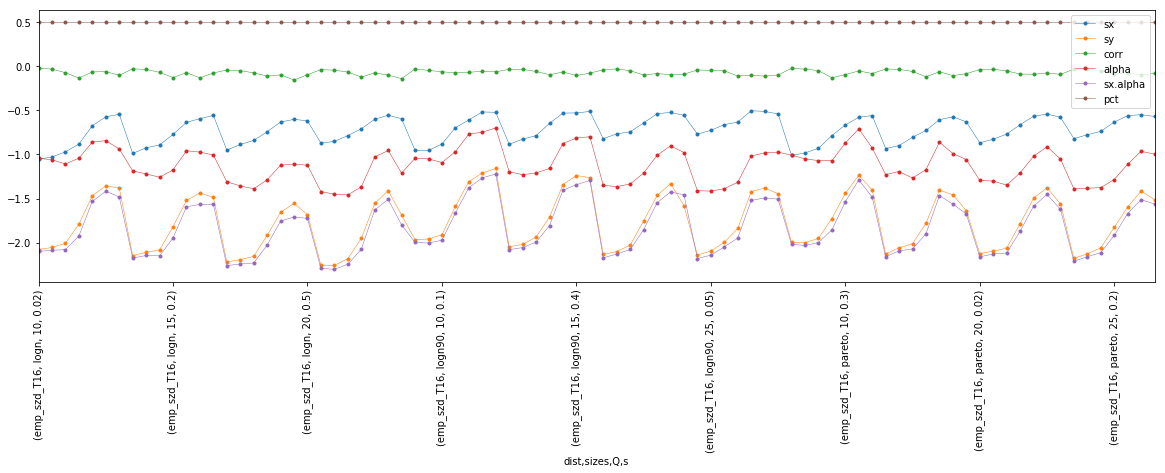

In [43]:
fig, ax = plt.subplots(1, figsize = (20, 5))
result_log_df.loc[result_log_df.dist == 'emp_szd_T16'].groupby(['dist', 'sizes', 'Q', 's']).mean().plot(ax = ax, marker = '.', lw = 0.5)
plt.xticks(rotation=90)

In [ ]:
# fig, ax = plt.subplots(1, figsize = (20, 5))
# result_log_df.loc[result_log_df.dist == 'emp_szd_T16'].groupby(['dist', 'sizes', 'Q', 's']).mean().plot(ax = ax, marker = '.', lw = 0.5)
# plt.xticks(rotation=90)

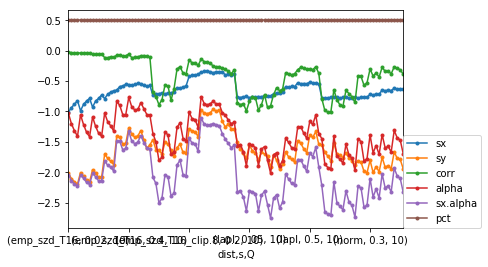

In [46]:
# The most clear dependence is with s.
all_q_means = result_log_df.groupby(['dist', 'sizes', 'Q', 's']).mean()

# all_q_means.sort_values(by = 'corr')
# # The empirical are the ones to show the best correlation.

# Q_dep1 = all_q_means.reset_index().groupby(['sizes','s', 'Q']).mean()
# Q_dep2 = all_q_means.reset_index().groupby(['dist','s', 'Q']).mean()
# pd.concat([Q_dep1, Q_dep2]).sort_index().plot(marker = '.', figsize = (20, 5))

Q_dep = all_q_means.reset_index().groupby(['dist','s', 'Q']).mean()
Q_dep.plot(marker = '.')
plt.legend(loc = (1, 0))

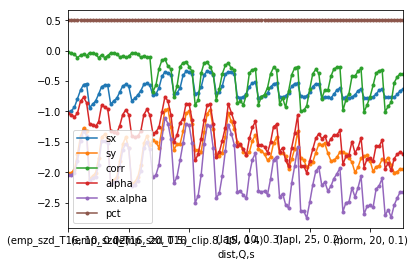

In [47]:
s_dep = all_q_means.reset_index().groupby(['dist','Q', 's']).mean()
s_dep.plot(marker = '.')


In [48]:
# s_dep = all_q_means.reset_index().groupby(['dist','Q', 's']).mean()
# s_dep.plot(marker = '.')


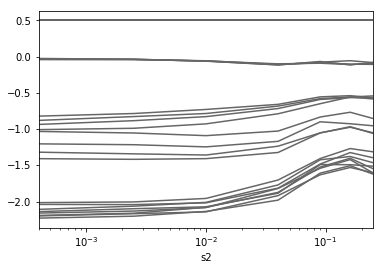

In [49]:
Q_dep = all_q_means.reset_index().groupby(['dist','s', 'Q']).mean()

# change to s2:
Q_dep = Q_dep.reset_index()
Q_dep['s2'] = Q_dep['s']**2
Q_dep = Q_dep.drop('s', axis = 1).set_index(['dist','s2', 'Q'])

fig, ax = plt.subplots(1)
df = Q_dep.loc['emp_szd_T16']
df.unstack().plot(ax = ax, legend = False, color = '.4')

# df = Q_dep.loc['lapl']
# df.unstack().plot(ax = ax, legend = False, color = '.7')

ax.set_xscale('log')
# ax.set_ylim(-2.5, 0.1)

# The difference with uncorrelated errors is in the corr and slope. It means dependence is very little in the upper qs, maybe cause they are too crazy.

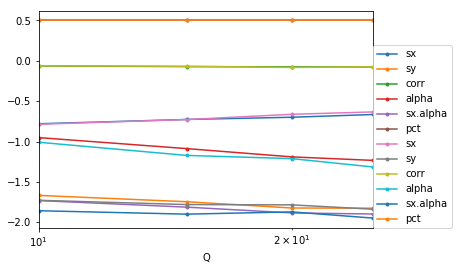

In [50]:
fig, ax = plt.subplots(1)

all_q_means.reset_index().groupby(['dist', 'Q']).mean().loc['emp_szd_T16'].drop('s', axis = 1).plot(marker = '.', ax = ax)
all_q_means.reset_index().groupby(['dist', 'Q']).median().loc['emp_szd_T16'].drop('s', axis = 1).plot(marker = '.', ax = ax, legend = False)
ax.legend(loc = (1, 0))

ax.set_xscale('log')

In [51]:
# fig, ax = plt.subplots(1)

# all_q_means.reset_index().groupby(['dist', 'Q']).mean().loc['emp_szd_T16'].drop('s', axis = 1).plot(marker = '.', ax = ax)
# all_q_means.reset_index().groupby(['dist', 'Q']).median().loc['emp_szd_T16'].drop('s', axis = 1).plot(marker = '.', ax = ax, legend = False)
# ax.legend(loc = (1, 0))

# ax.set_xscale('log')
# ax.

In [52]:
df = all_q_means.loc['emp_szd_T16'].reset_index().groupby(['s','Q']).median()

for col in df.columns:
    print(col)
    for s in df.index.get_level_values('s').unique():
        df_ = df.loc[s]
        print(np.polyfit(np.log10(df_.index), df_[col], 1))

sx
[ 0.48201984 -1.49552615]
[ 0.52154476 -1.50675361]
[ 0.47937865 -1.3948356 ]
[ 0.39567119 -1.18431638]
[ 0.27674776 -0.93645204]
[ 0.07938778 -0.65600747]
[-0.07450899 -0.47108253]
sy
[-0.42936941 -1.58628079]
[-0.32148136 -1.67981165]
[-0.29341455 -1.66478971]
[-0.25118813 -1.4763748 ]
[-0.297664   -1.11195358]
[-0.38900809 -0.89093718]
[-0.4017112  -1.00040556]
corr
[-0.04008099  0.01649014]
[-0.02231753 -0.00884187]
[ 0.02331973 -0.08515093]
[ 0.06249471 -0.19023312]
[-0.03365296 -0.03365295]
[-0.1036502   0.03755991]
[-0.04322021 -0.03453704]
alpha
[-0.91997472 -0.11893626]
[-0.94080046 -0.11436247]
[-0.75645975 -0.34943014]
[-0.64945865 -0.39341769]
[-0.48645911 -0.35325243]
[-0.47952718 -0.31459433]
[-0.22156892 -0.72559812]
sx.alpha
[-0.46078522 -1.57928087]
[-0.31931724 -1.71489285]
[-0.30364948 -1.70564987]
[-0.17821266 -1.67656112]
[-0.28062818 -1.21209666]
[-0.46903624 -0.88190887]
[-0.25545118 -1.24622968]
pct
[-9.04227588e-17  5.00000000e-01]
[-9.04227588e-17  5.000000

In [53]:
# df = all_q_means.loc['emp_szd_T16'].reset_index().groupby(['s','Q']).median()

# for col in df.columns:
#     print(col)
#     for s in df.index.get_level_values('s').unique():
#         df_ = df.loc[s]
#         print(np.polyfit(np.log10(df_.index), df_[col], 1))

(5, 35)

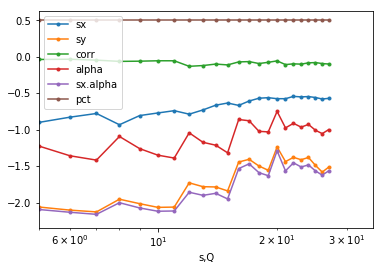

In [54]:
df.plot(marker = '.')
plt.xscale('log')
plt.xlim(5, 35)

## Dependence with s

In [2]:
# [['norm', 'lapl']['emp_szd_T16_clip.8', 'emp_szd_T16']][j % 2][j//2]

# Aggregate volatility main plot

In [5]:
full_data = pd.read_csv('./../../data/processed/full_data_qi_var.csv')

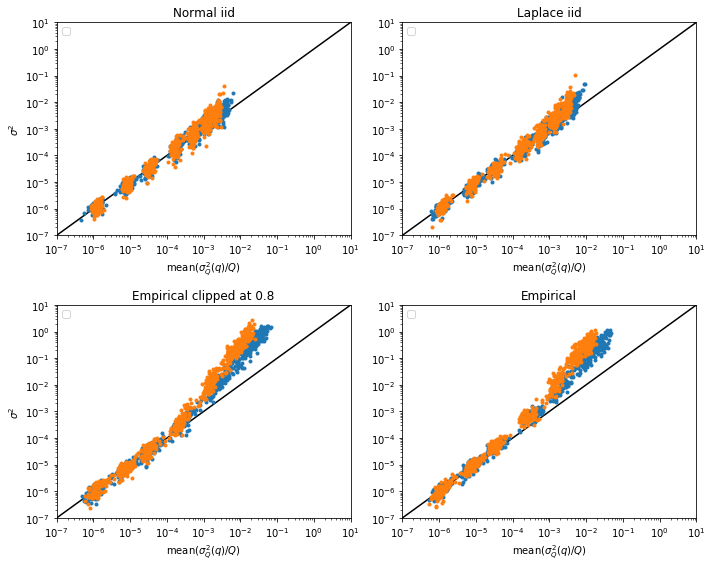

In [8]:
growth_rates = ['norm', 'lapl', 'emp_szd_T16_clip.8', 'sbtn']
fig, axs = plt.subplots(2, 2, figsize = (10, 8))

sizes = 'logn'
for j, dist in enumerate(growth_rates):
    ax = axs[j//2][j % 2]
    ax.set_title([['Normal iid', 'Laplace iid'],['Empirical clipped at 0.8', 'Empirical']][j//2][j % 2])
    
    result = full_data.loc[(full_data.sizes == sizes) & (full_data.dist == dist)]

    df = result.set_index(['Q', 's', 'i'])
    df['var_diff_qi/Q'] = df['var_diff_qi']/df.index.get_level_values('Q')

    for Q in [10, 20]:
        df_ = df.loc[Q]
        integral_result = df_.groupby(level = ['s', 'i'])[['var_diff_qi/Q', 'var_diff_agg_i']].mean()
        integral_result.plot(x = 'var_diff_qi/Q', y = 'var_diff_agg_i', marker = '.', lw = 0, ax = ax, label = '_')

#         x = np.log10(integral_result['var_diff_qi/Q'])
#         line = np.polyfit(x, np.log10(integral_result['var_diff_agg_i']), 1)
#         integral_result['y'] = integral_result['var_diff_qi/Q'].copy()**(line[0])*np.power(10, line[1])
#         equation_str = r'$'+str(round(np.power(10, line[1]), 1))+'\ x^{'+str(round(line[0],2))+'}$'
#         integral_result.plot(x = 'var_diff_qi/Q', y = 'y', ax = ax, label = equation_str, color = 'w')
#     integral_result['y'] = integral_result['var_diff_agg_i'].copy()
    x = np.array([1e-7, 10])
    ax.plot(x, x, label = 'identity', color = '.5', zorder = -1)
    #     # ax.plot(x, line[0]*x + line[1])

    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.set_xlim(1e-7, 10)
    ax.set_ylim(1e-7, 10)
    
    ax.set_xlabel('mean('+r'$\sigma^2_Q(q)/Q$'+')')
    if j%2 == 0: ax.set_ylabel(r'$\sigma^2$')

plt.tight_layout()
# plt.savefig('./../../../WRITING/paper1_writing/figures/identity_integral.png', dpi = 400)
plt.show()

In [57]:
integral_result = df.groupby(level = ['Q', 's', 'i'])[['var_diff_qi', 'var_diff_agg_i']].mean()

const             -1.323142
log_var_diff_qi    0.384627
log_indiv_s        0.541093
log_Q             -0.174190
dtype: float64

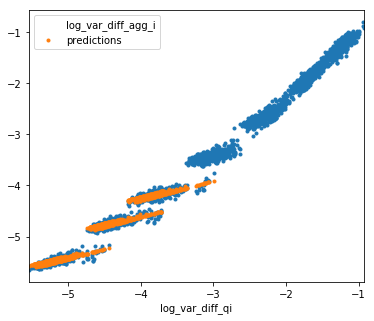

In [58]:
data = np.log10(integral_result[['var_diff_agg_i', 'var_diff_qi']]).add_prefix('log_')
data = data.loc[data.index.get_level_values('s') < .15]
# data['log_indiv_s**2'] = np.log10(.8*data.index.get_level_values('s'))**2
data['log_indiv_s'] = np.log10((.8*data.index.get_level_values('s'))**2)
data['log_Q'] = np.log10(data.index.get_level_values('Q'))
data
import statsmodels.api as sm


X = data[['log_var_diff_qi', 'log_indiv_s', 'log_Q']]
X = sm.add_constant(X)
y = data['log_var_diff_agg_i']

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
# model.params()

# data
fig, ax = plt.subplots(1, figsize = (6, 5))
integral_result['log_var_diff_qi'] = np.log10(integral_result['var_diff_qi'])
integral_result['log_var_diff_agg_i'] = np.log10(integral_result['var_diff_agg_i'])
integral_result.plot(x = 'log_var_diff_qi', y = 'log_var_diff_agg_i', marker = '.', lw = 0, ax = ax)

data['predictions'] = predictions
# data['predictions_2'] =  .6*data['log_var_diff_qi/Q'] - 0.1*data['log_indiv_s**2']
data.plot(x = 'log_var_diff_qi', y = 'predictions', ax = ax, marker = '.', lw = 0)
# data.plot(x = 'log_var_diff_qi/Q', y = 'predictions_2', ax = ax, marker = '.', lw = 0)
model.params

# Older

In [ ]:
xx

In [ ]:
# Here we do an experiment where we set levels of background variance and see the oo of the dependence with many quantiles.
# The idea is to have a correct idea of the dependence around zero.
# I have seen an expression where var = var_q/Q. How does it look in real 

## Import 
# df = pd.read_csv('./../../data/processed/exp_var_lapl_1s_s0.3.csv').set_index(['Q', 'q', 'i']).sort_index()
# df = pd.read_csv('./../../data/processed/exp_var_sbtn_1s_s0.3.csv').set_index(['Q', 'q', 'i']).sort_index()

T = 16
t0D = .4
# the variable to fit

df_xy_list = []
var_diff_i_list = []
sizes = 'logn90'
 
for dist in ['norm', 'lapl']:
    print(dist)
    # Load previously simulated
    filename = './../../data/processed/exp_var_'+dist+'_1s_'+sizes+'.csv'
    df = pd.read_csv(filename).set_index(['Q', 'q', 'i']).sort_index()
    df['ti'] = df['var_qi']/df['s']**2
    df['tdiffi'] = df['var_diff_qi']/df['s']**2
    
    I = df.index.get_level_values('i').max() + 1; keep = int(.5*I)    
    ### 
    # DROP CASES WHERE QUANTILES ARE FAR FROM BALANCED
    ###
    df = df.reset_index().set_index(['s','Q', 'q', 'i'])
    df_lin_vals = df[[str(t) for t in range(T + 1)]]
    grouped = df_lin_vals.mean(1).groupby(level = [0, 1, 3]) 
    acceptables = (np.log10(grouped.max()) - np.log10(grouped.min())).groupby(level = [0, 1]).nsmallest(keep).sort_index()
    acceptables.index = acceptables.index.droplevel([0, 1])
    df = df.reset_index().set_index(['s', 'Q', 'i']).loc[acceptables.index].reset_index().set_index(['Q', 'q', 'i'])

#     hvar = 'ti'
    hvar = 'tdiffi'
    hvar0 = 'tdiff0'
    
    values_check = df.reset_index()[['q', hvar]].sort_values(by = ['q', hvar])
    s_dist_grouped = values_check.groupby('q').agg(['min', 'max'])[hvar]
    # parametric pts between these values
    t0i = s_dist_grouped[['min']].quantile(.7).values
    t0f = s_dist_grouped[['max']].quantile(.3).values
    dist_s_t0_levels = (t0i + np.arange(0, 1, t0D)*(t0f - t0i)).round(4)
    
    for s in [0.2, 0.4]:#df.s.unique():
        df_ = df.loc[df.s == s]
        
        ###
        # DECIDE ON THE X0 LEVELS.
        ###
        # They could be the median or they could also be some fixed levels of x0. 

#         df['dev_median'] = df.groupby(level=[0,1]).apply(lambda x: abs(x - x.median()))[y]#.plot(marker = '.')
#         df_x0var_pool = df.groupby(level=[0,1]).apply(lambda x: x.nsmallest(3, 'dev_median').reset_index(drop = True))

        # # Pool of qi's with the required x0
        df_ = df_.drop(['dist', 'sizes'], axis = 1)
        for t0 in dist_s_t0_levels:
            df_['dev_t0'] = df_.groupby(level=[0,1]).apply(lambda x: abs(x - t0))[hvar]#.plot(marker = '.')
            df_t0var_pool = df_.groupby(level=[0,1]).apply(lambda x: x.nsmallest(1, 'dev_t0').reset_index(drop = True))

            for Q_ in df_.index.get_level_values('Q').unique():
                df_Q = df_.loc[Q_]

                # Option 1. Sample median blocks only once. Shuffling of other blocks will not introduce noise.
#                 t0_draw = df_t0var_pool.loc[Q_].groupby(level=[0]).apply(lambda x: x.sample(1).reset_index(drop = True))
                t0_draw = df_t0var_pool.loc[Q_]
                t0_draw = t0_draw.rename(columns = {'ti': 't0q', 'tdiffi': 'tdiff0q'})
                
                df_xy_qparts_list = []
                for q in range(Q_):
                    print(s, t0, Q_, q)
                    df_q = df_Q.loc[q]
                    
                    df_q_part = df_q
                    var_i_list = []
                    var_diff_i_list = []
                    for i, row in df_q_part.iterrows():
                        # Insert the i row in place of the median for q.
                        df_i = t0_draw.copy()
                        row = pd.DataFrame(row).T
                        row.index = pd.MultiIndex.from_product([[q], row.index])
                        df_i = df_i.drop(q).append(row)

                        # Do the total, get it's var. this is 'y'. store
                #         var_i = df_i[range(T)].sum().var()
                        value_sum = df_i[[str(t) for t in range(T + 1)]].sum()
                        var_i = np.log10(value_sum).var() # we possibly want the var of logs.
                        var_diff_i = np.log10(value_sum).diff().var() 
                        var_i_list += [var_i]
                        var_diff_i_list += [var_diff_i]
                    df_xy_qpart = df_q_part[['var_qi', 'var_diff_qi']]
                    df_xy_qpart['t_qi'] = df_xy_qpart['var_qi']/s**2
                    df_xy_qpart['tdiff_qi'] = df_xy_qpart['var_diff_qi']/s**2
                    df_xy_qpart['y'] = np.array(var_i_list)
                    df_xy_qpart['ydiff'] = np.array(var_diff_i_list)
                    df_xy_qpart['q'] = q
                    df_xy_qpart = df_xy_qpart.reset_index() # so that we have the i's as a column

                    df_xy_qparts_list += [df_xy_qpart]

                df_xy_ = pd.concat(df_xy_qparts_list)
                df_xy_['Q'] = Q_
                df_xy_['s'] = s
                df_xy_['dist'] = dist
                df_xy_[hvar0] = t0 # this is the theoretical/aimed one
                # merge the actual t0 of all 
                df_xy_ = df_xy_.merge(t0_draw.reset_index()[['q', hvar0+'q']]) # this is the actual one
                # these are the 'y0' levels
                value_sum_t0 = t0_draw[[str(t) for t in range(T + 1)]].sum()
                df_xy_['var_t0'] = np.log10(value_sum).var() # we possibly want the var of logs.
                df_xy_['var_diff_t0'] = np.log10(value_sum).diff().var() 
                df_xy_list += [df_xy_]

df_xy = pd.concat(df_xy_list)
df_xy['y/s2'] = df_xy['y']/(df_xy.s)**2
df_xy['ydiff/s2'] = df_xy['ydiff']/(df_xy.s)**2
df_xy['var_t0/s2'] = df_xy['var_t0']/(df_xy.s)**2
df_xy['var_diff_t0/s2'] = df_xy['var_diff_t0']/(df_xy.s)**2

# df_xy['t0'] = df_xy.t0.round(4)
df_xy[hvar0] = df_xy[hvar0].round(4)
# df_xy.to_csv('./../../data/processed/20190715_depce_test_'+sizes+'_diff.csv')

## Loop adapted for median

In [ ]:
# Here we do an experiment where we set levels of background variance and see the oo of the dependence with many quantiles.
# The idea is to have a correct idea of the dependence around zero.
# I have seen an expression where var = var_q/Q. How does it look in real 

## Import 
# df = pd.read_csv('./../../data/processed/exp_var_lapl_1s_s0.3.csv').set_index(['Q', 'q', 'i']).sort_index()
# df = pd.read_csv('./../../data/processed/exp_var_sbtn_1s_s0.3.csv').set_index(['Q', 'q', 'i']).sort_index()

T = 16
t0D = .4
# the variable to fit

df_xy_list = []
var_diff_i_list = []
sizes = 'logn90'
 
for dist in ['norm', 'lapl']:
    print(dist)
    # Load previously simulated
    filename = './../../data/processed/exp_var_'+dist+'_1s_'+sizes+'.csv'
    df = pd.read_csv(filename).set_index(['Q', 'q', 'i']).sort_index()
    df['ti'] = df['var_qi']/df['s']**2
    df['tdiffi'] = df['var_diff_qi']/df['s']**2
    
    I = df.index.get_level_values('i').max() + 1; keep = int(.5*I)    
    ### 
    # DROP CASES WHERE QUANTILES ARE FAR FROM BALANCED
    ###
    df = df.reset_index().set_index(['s','Q', 'q', 'i'])
    df_lin_vals = df[[str(t) for t in range(T + 1)]]
    grouped = df_lin_vals.mean(1).groupby(level = [0, 1, 3]) 
    acceptables = (np.log10(grouped.max()) - np.log10(grouped.min())).groupby(level = [0, 1]).nsmallest(keep).sort_index()
    acceptables.index = acceptables.index.droplevel([0, 1])
    df = df.reset_index().set_index(['s', 'Q', 'i']).loc[acceptables.index].reset_index().set_index(['Q', 'q', 'i'])

#     hvar = 'ti'
    hvar = 'tdiffi'
    hvar0 = 'tdiff0'
    
#     values_check = df.reset_index()[['q', hvar]].sort_values(by = ['q', hvar])
#     s_dist_grouped = values_check.groupby('q').agg(['min', 'max'])[hvar]
#     # parametric pts between these values
#     t0i = s_dist_grouped[['min']].quantile(.7).values
#     t0f = s_dist_grouped[['max']].quantile(.3).values
#     dist_s_t0_levels = (t0i + np.arange(0, 1, t0D)*(t0f - t0i)).round(4)
    dist_s_t0_levels = np.array(['median'])

    for s in [0.2, 0.4]:#df.s.unique():
        df_ = df.loc[df.s == s]
        
        ###
        # DECIDE ON THE X0 LEVELS.
        ###
        # They could be the median or they could also be some fixed levels of x0. 

#         df['dev_median'] = df.groupby(level=[0,1]).apply(lambda x: abs(x - x.median()))[y]#.plot(marker = '.')
#         df_x0var_pool = df.groupby(level=[0,1]).apply(lambda x: x.nsmallest(3, 'dev_median').reset_index(drop = True))

        # # Pool of qi's with the required x0
        df_ = df_.drop(['dist', 'sizes'], axis = 1)
        for t0 in dist_s_t0_levels:
#             df_['dev_t0'] = df_.groupby(level=[0,1]).apply(lambda x: abs(x - t0))[hvar]#.plot(marker = '.') ### ATENCION
            df_['dev_t0'] = df_.groupby(level=[0,1]).apply(lambda x: abs(x - x.median()))[hvar]#.plot(marker = '.')
            df_t0var_pool = df_.groupby(level=[0,1]).apply(lambda x: x.nsmallest(1, 'dev_t0').reset_index(drop = True))

#             for Q_ in df_.index.get_level_values('Q').unique():
            for Q_ in [10, 20]:
                df_Q = df_.loc[Q_]

                # Option 1. Sample median blocks only once. Shuffling of other blocks will not introduce noise.
#                 t0_draw = df_t0var_pool.loc[Q_].groupby(level=[0]).apply(lambda x: x.sample(1).reset_index(drop = True))
                t0_draw = df_t0var_pool.loc[Q_]
                t0_draw = t0_draw.rename(columns = {'ti': 't0q', 'tdiffi': 'tdiff0q'})
                
                df_xy_qparts_list = []
                for q in range(Q_):
                    print(s, t0, Q_, q)
                    df_q = df_Q.loc[q]
                    
                    df_q_part = df_q
                    var_i_list = []
                    var_diff_i_list = []
                    for i, row in df_q_part.iterrows():
                        # Insert the i row in place of the median for q.
                        df_i = t0_draw.copy()
                        row = pd.DataFrame(row).T
                        row.index = pd.MultiIndex.from_product([[q], row.index])
                        df_i = df_i.drop(q).append(row)

                        # Do the total, get it's var. this is 'y'. store
                #         var_i = df_i[range(T)].sum().var()
                        value_sum = df_i[[str(t) for t in range(T + 1)]].sum()
                        var_i = np.log10(value_sum).var() # we possibly want the var of logs.
                        var_diff_i = np.log10(value_sum).diff().var() 
                        var_i_list += [var_i]
                        var_diff_i_list += [var_diff_i]
                    df_xy_qpart = df_q_part[['var_qi', 'var_diff_qi']]
                    df_xy_qpart['t_qi'] = df_xy_qpart['var_qi']/s**2
                    df_xy_qpart['tdiff_qi'] = df_xy_qpart['var_diff_qi']/s**2
                    df_xy_qpart['y'] = np.array(var_i_list)
                    df_xy_qpart['ydiff'] = np.array(var_diff_i_list)
                    df_xy_qpart['q'] = q
                    df_xy_qpart = df_xy_qpart.reset_index() # so that we have the i's as a column

                    df_xy_qparts_list += [df_xy_qpart]

                df_xy_ = pd.concat(df_xy_qparts_list)
                df_xy_['Q'] = Q_
                df_xy_['s'] = s
                df_xy_['dist'] = dist
                df_xy_[hvar0] = t0 # this is the theoretical/aimed one
                # merge the actual t0 of all 
                df_xy_ = df_xy_.merge(t0_draw.reset_index()[['q', hvar0+'q']]) # this is the actual one
                # these are the 'y0' levels
                value_sum_t0 = t0_draw[[str(t) for t in range(T + 1)]].sum()
                df_xy_['var_t0'] = np.log10(value_sum).var() # we possibly want the var of logs.
                df_xy_['var_diff_t0'] = np.log10(value_sum).diff().var() 
                df_xy_list += [df_xy_]

df_xy = pd.concat(df_xy_list)
df_xy['y/s2'] = df_xy['y']/(df_xy.s)**2
df_xy['ydiff/s2'] = df_xy['ydiff']/(df_xy.s)**2
df_xy['var_t0/s2'] = df_xy['var_t0']/(df_xy.s)**2
df_xy['var_diff_t0/s2'] = df_xy['var_diff_t0']/(df_xy.s)**2

# df_xy['t0'] = df_xy.t0.round(4)
# df_xy[hvar0] = df_xy[hvar0].round(4)
# df_xy.to_csv('./../../data/processed/20190715_depce_test_'+sizes+'_diff_mediant0.csv')
df_xy.to_csv('./../../data/processed/20190718_depce_test_'+sizes+'_diff_mediant0.csv')

In [ ]:
df_.index.get_level_values('Q').unique()

In [ ]:
df_xy.to_csv('./../../data/processed/20190718_depce_test_'+sizes+'_diff_mediant0.csv')

### Fit lines/parabolas for slope at x0.

In [ ]:
# # ## Load if needed 
# df_xy1 = pd.read_csv('./../../data/processed/20190712_x0_depce_test_full.csv')
# df_xy2 = pd.read_csv('./../../data/processed/20190712_x0_depce_test_full2.csv')
# df_xy3 = pd.read_csv('./../../data/processed/20190712_x0_depce_test_full3.csv')
# df_xy = pd.concat([df_xy1, df_xy2, df_xy3], axis = 0)

# # Falta Q = 20, q in (0, 5)
# # df_xy.groupby(['Q', 'q']).count().loc[20]

# df_xy = pd.read_csv('./../../data/processed/20190715_depce_test.csv')

In [ ]:
# Scale by s2. Careful not to run twice.

# df_xy['var_qi'] = df_xy['var_qi']/(df_xy.s)**2
# df_xy['y/s2'] = df_xy['y']/(df_xy.s)**2
# df_xy['ydiff/s2'] = df_xy['ydiff']/(df_xy.s)**2
# df_xy['t0'] = df_xy['x0']/(df_xy.s)**2

# Actually (var_qi - x0) should be now (t_qi - t0) and 'y' should be (sigma/s)

In [ ]:
# for dist in ['norm', 'lapl']:
#     print(dist)
#     # Load previously simulated
#     filename = './../../data/processed/exp_var_'+dist+'_1s_'+sizes+'.csv'
#     df = pd.read_csv(filename).set_index(['Q', 'q', 'i']).sort_index()
    
# print(df_xy.groupby('dist').s.unique())

In [ ]:
# df_xy_ = 
# df_xy_.merge(t0_draw.reset_index()[['q', hvar]].rename(columns = {hvar: hvar+'q'}))


In [ ]:
xvar = 'tdiff_qi'
yvar = 'ydiff/s2'
t0var = 'tdiff0'


fig, ax = plt.subplots(1, figsize = (7, 5))

fits1 = []
fits2 = []
for dist in df_xy.dist.unique():
    print(dist)
    df_xy_d = df_xy.loc[df_xy.dist == dist]
    for Q in df_xy.Q.unique():
        print(Q)
        df_xy_dQ = df_xy_d.loc[df_xy_d.Q == Q]
        for s in df_xy.s.unique():
            df_xy_dQs = df_xy_dQ.loc[df_xy_dQ.s == s]
            for q in range(Q):
                
                df_xy_dQqs = df_xy_dQs.loc[df_xy_dQs.q == q]
                for t0 in df_xy_dQqs[hvar0].unique():
                    df_xy_dQqs0 = df_xy_dQqs.loc[df_xy_dQqs[hvar0] == t0]
                    t0q = df_xy_dQqs0.tdiff0q.unique()[0] # There should be only one value for all the i's with this q

                    x = df_xy_dQqs0[xvar]
                    y = df_xy_dQqs0[yvar]
                    corrcoef = np.corrcoef(x, y)[0, 1]

                    line = np.polyfit(x, y, 1)
                    curv = np.polyfit(x, y, 2)

                    fits1 += [np.hstack((line, [q, Q, s, dist, t0, t0q, corrcoef, x.std(), y.std()]))]
                    fits2 += [np.hstack((curv, [q, Q, s, dist, t0, t0q, corrcoef, x.std(), y.std()]))]
                    
                    df_xy_q = df_xy.loc[df_xy.q == q]

                if (s, Q) == (.4, 20):
#                 if s == .4:
                    df_xy_dQqs0 = df_xy_dQqs.loc[df_xy_dQqs[hvar0] == df_xy_dQqs[hvar0].unique()[0]]
    
#                     ax.plot(df_xy_dQqs0[xvar], df_xy_dQqs0[yvar], '.', alpha = .5)

                    xfit = np.arange(x.min(), x.max(), .01)
                    ax.plot(xfit, xfit*line[0] + line[1], c = 'r', alpha = .5)
                    ax.scatter(x.median(), x.median()*line[0] + line[1], c = 'r', marker = '.')
                    
#                     bin_mean = df_xy_dQqs0.groupby(pd.qcut(df_xy_dQqs0[xvar], 10)).mean()
#                     bin_mean.plot(xvar, yvar, marker = 'o', ax = ax)

                    ax.set_xlim(0, 2)
                    ax.set_ylim(0, .15)
                    ax.set_xlabel('tdiff_q') 
                    ax.set_ylabel('ydiff/s2')
plt.show()

In [ ]:
fits1 = pd.DataFrame(np.array(fits1), columns = ['a', 'b', 'q', 'Q', 's', 'dist', hvar0, hvar0+'q', 'corr', 'sx', 'sy'])
fits2 = pd.DataFrame(np.array(fits2), columns = ['a', 'b', 'c', 'q', 'Q', 's', 'dist', hvar0, hvar0+'q', 'corr', 'sx', 'sy'])

for df_ in [fits1, fits2]:
    for col in df_.columns:
        df_[col] = pd.to_numeric(df_[col], errors='ignore')
    
# x = 0.03
# df_.a*x**2 + df_.b**x + df_.c

# fits1['s0'] = 2 * fits1.a * fits1.x0 + fits1.b
fits1['s0/s2'] = fits1.a * fits1[hvar0+'q'] + fits1.b

fits1.to_csv('./../../data/processed/20190718_depce_test_fits1_'+sizes+'_diff_median.csv', index = False)
fits2.to_csv('./../../data/processed/20190718_depce_test_fits2_'+sizes+'_diff_median.csv', index = False)

In [ ]:
fits1.nunique()

In [ ]:
# fits1.plot(x = 'tdiff0',y = 'tdiff0q', marker = '.', lw = 0)
# fits1.hist('tdiff0q',bins = 50)

## Decomposition into slope + sx

In [ ]:
# fits1['ratio'] = fits1['corr']*fits1['sy']/fits1['sx']
fits1['ratio'] = fits1['a']*fits1['sx']/(fits1['corr'].mean())

fits1[['sy', 'ratio']].plot(marker = '.')
# fits1['corr'].plot(marker = '.'); plt.ylim(-1, 1)

In [ ]:
fits1['pct'] = (fits1['q'] + .5)/fits1['Q']
fits1['pct'] = pd.cut(fits1['pct'], np.arange(0, 1.1, 0.1))
fits1 = fits1.groupby('pct').mean().reset_index()

fig, ax = plt.subplots(1, figsize = (7, 5))
fits1.plot('pct', 'a', marker = '.', lw = 1, ax = ax)
fits1.plot('pct', 'sx', marker = '.', lw = 1, ax = ax)
fits1.plot('pct', 'ratio', marker = '.', lw = 1, ax = ax)
ax.set_yscale('log')

## Debug of the Series approx

In [ ]:
pd.options.display.max_columns = 50

In [ ]:
fits1['tdiff0q'] = fits1['tdiff0q'].round(10);
df_xy['tdiff0q'] = df_xy['tdiff0q'].round(10);
# saved numerical mismatch

merged = fits1.merge(df_xy, on = ['Q', 'q', 's', 'dist', 'tdiff0', 'tdiff0q'])
# merged = merged.loc[(merged.s == .2) & (merged.Q == 10)]
# .nunique()
merged.nunique()

In [ ]:
merged['series_term_Qqi'] = merged['a']*merged['tdiff_qi'] + merged['b'] - merged['s0/s2']

merged[['ydiff/s2', 's0/s2', 'series_term_Qqi']].plot(alpha = 1)

In [ ]:
merged.groupby(['dist', 's', 'Q', 'i']).aggregate({'series_term_Qqi': ['count', 'sum']}).plot()

In [ ]:
fits1
df_xy.loc[(df_xy.s > .19) & (df_xy.Q == 10)].nunique()

In [ ]:
fits1.head()

In [ ]:
# Actual cases where all variables depart in different directions

df['tdiffi'] = df['var_diff_qi']/df['s']**2
df['ydiffi/s2'] = df['var_diff_agg_i']/df['s']**2

merged = df[['s', 'var_diff_qi', 'ydiffi/s2', 'dist', 'sizes','tdiffi']].reset_index().merge(fits1[['a','b','q','Q','s','dist']])
merged['series_term_Qqi'] = merged['a']*merged['tdiffi']

result_direct = merged.groupby(['dist', 's', 'Q', 'i']).aggregate({'series_term_Qqi': 'sum', 'ydiffi/s2': 'first'})

result_direct.plot(x = 'series_term_Qqi', y = 'ydiffi/s2', marker = '.', lw = 0)
plt.plot([[0, 0], [1, 1]])
plt.xlim(0,0.3)
plt.ylim(0,0.3)
plt.show()


In [ ]:
result_direct.plot(alpha = .6)

In [ ]:
result_direct.groupby(level = [0,1,2]).count()

# Analysis

In [ ]:
# # Dependence with Q and s


for Q_ in df_.Q.unique():
    fig, ax = plt.subplots(1, figsize = (7, 5))
    ax.set_title(str(Q_)+', '+str(s_))
    for s_ in df_.s.unique():
        df_.loc[(df_.Q == Q_) & (df_.s == s_)].plot('x0', 's0', marker = '.', lw = 0, ax = ax)
#         ax.set_xlim(0, 0.025)
#         ax.set_ylim(0, 0.04)
    plt.show()
    
# Attention. We want x0 values to be comfortably reachable. Otherwise I will just be having them clipped for some of the Q, s, q combinations.

values_check = df_xy.reset_index(drop = True).drop(['y', 'x0'], axis = 1).drop_duplicates().sort_values(by = ['q', 'var_qi'])
# grouped = values_check.loc[(values_check.dist == 'norm')].groupby(['Q', 's', 'q'])
grouped = values_check.groupby(['dist','s', 'q'])

fig, ax = plt.subplots(1, figsize = (17, 5))
grouped.agg(['min', 'max'])['var_qi'].plot(ax = ax)
# ax.axhline(0.01)
# ax.axhline(0.02)
# ax.set_ylim(0, 0.03)
ax.set_yscale('log')

s_dist_grouped = grouped.agg(['min', 'max'])['var_qi'].groupby(level = [0, 1])
x0_s_dist = pd.concat([s_dist_grouped['min'].quantile(.7) + \
           l*(s_dist_grouped['max'].quantile(.3) - s_dist_grouped['min'].quantile(.7)) for l in np.arange(0, 1, .1)], axis = 1).round(4)

df_ = grouped.agg(['min', 'max'])['var_qi'].reset_index().merge(x0_s_dist.reset_index()).set_index(['dist', 's', 'q'])
df_[range(10)].plot(color = '.4', linestyle = '--', ax = ax)
plt.show()

In [ ]:
df_ = fits1.set_index(['dist']).loc['norm']
## Dependence with Q

fig, ax = plt.subplots(1, figsize = (7, 5))
aQ = []
for Q_ in df_.Q.unique():
    s_ = .3 
    ax.set_title(str(Q_)+', '+str(s_))
    data = df_.loc[(df_.Q == Q_) & (df_.s == s_)]
    data.plot('x0', 's0', marker = '.', lw = 0, ax = ax)
    
    line = np.polyfit(data.x0, data.s0, 1)
    ax.plot(np.arange(0, 0.035, 0.01), np.arange(0, 0.035, 0.01)*line[0] + line[1])
    print(line.round(3))
    # This is useful for a(Q). For now not a clearly explainable dependence
    aQ += [line[0]]
aQ = np.array(aQ) 
# ax.set_xlim(0, 0.025)
# ax.set_ylim(0, 0.04)
plt.show()

#### Partial derivatives at x0

In [ ]:
fits2['part_dev_x0'] = 2 * fits2.a * fits2.x0 + fits2.b
df_ = fits2.set_index(['dist']).loc['norm']

part_devs_q = df_.loc[df_.s == .3].groupby(['Q', 'q'])['part_dev_x0'].describe()[['mean', '25%','50%','75%']]
part_devs_q = part_devs_q.reset_index()
part_devs_q['pct'] = (part_devs_q['q'] + .5)/part_devs_q['Q']

fig, ax = plt.subplots(1, figsize = (7, 5))
for Q_ in part_devs_q.Q.unique():
    data = part_devs_q.loc[part_devs_q.Q == Q_]
    ax.fill_between(data.pct, Q_*data['25%'], Q_*data['75%'], alpha = .25)
plt.show()
# High q are the little populated, volatile ones.

### The $(\sigma^2_q - \sigma^2_0)$ term
Computed as difference between median and x0. It is just to have a qualitative idea, cause actually $\sigma^2_q$ will be given in each custom case

In [4]:
# describe var_qi by dist, Q, q, s (s = .3 for now)
describe = df_xy.loc[df_xy.s == .3].drop(['y','x0'], axis = 1).drop_duplicates().groupby(['dist','Q','q','s'])['var_qi'].describe()
describe = describe.loc['lapl']

describe = describe.reset_index()
describe['pct'] = (describe['q'] + .5)/describe['Q']

fig, ax = plt.subplots(1, figsize = (7, 5))
for Q_ in describe.Q.unique():
    data = describe.loc[describe.Q == Q_]
    ax.fill_between(data.pct, data['25%'], Q_*data['75%'], alpha = .1)
    ax.plot(data.pct, data['50%'], color = '.5')
# plt.yscale('log')
plt.ylim(0, 0.2)
plt.show()


NameError: name 'df_xy' is not defined

## A term: $\frac{\partial \sigma^2}{\partial \sigma^2_q} (\sigma^2_q - \sigma^2_0) $

We use as x_0 = 0.02 as it is a quite good approx for all the pcts in the lower part of value.

In [ ]:
x0_ = 0.019

In [ ]:
# describe var_qi by dist, Q, q, s (s = .3 for now)
df_ = df_xy.loc[df_xy.s == .3].drop(['x0'], axis = 1).drop_duplicates()
df_ = df_xy.loc[(df_xy.s == .3) & (df_xy.x0 == x0_)]#.drop(['x0'], axis = 1).drop_duplicates()
describe_var_q = df_.groupby(['dist','Q','q','s'])[['var_qi', 'y']].describe()

df_ = fits2.loc[fits2.s == .3]
describe_part_dev_x0 = df_.groupby(['dist','Q', 'q', 's'])[['part_dev_x0']].describe()

describe = pd.concat([describe_var_q, describe_part_dev_x0], axis = 1)
describe = describe.iloc[:, describe.columns.get_level_values(1).isin(['25%','50%','75%'])]

describe = describe.reset_index()
describe['pct'] = (describe['q'] + .5)/describe['Q']

In [ ]:
# I'm trying to reconstruct the y from a sum for all q of  ds/dsq .(sq - s0)

fig, ax = plt.subplots(1, figsize = (7, 5))
for i, Q_ in enumerate([10, 15, 25]):
    y0 = aQ[i] * x0_
    df_ = describe.loc[(describe.dist == 'norm') & (describe.Q == Q_)]
    # Evaluated at the medians:
    yq = Q_ * df_['part_dev_x0']['50%'] * (df_['var_qi']['50%'] - 0.019)
    yq = df_['part_dev_x0']['50%'] * (df_['var_qi']['50%'] - x0_)
    ax.plot(df_.pct, yq, marker = '.')
    ax.axhline(y0 , color = '.4')

describe.groupby(['dist', 'Q']).mean()['y'].plot(ax = ax) # Should be always the same value...
# plt.ylim(0, 0.02)

plt.show()
# It doesn quite work at the median... may be because, eg. in the median case all (x-x0) are positive, while 
# in particular cases they will be on both sides, therefor counteracting.

### xq are medians

In [ ]:
# I'm trying to reconstruct the y from a sum for all q of  ds/dsq .(sq - s0)

fig, ax = plt.subplots(1, figsize = (7, 5))
for i, Q_ in enumerate([10, 15, 25]):
    y0 = aQ[i] * x0_
    df_ = describe.loc[(describe.dist == 'norm') & (describe.Q == Q_)]
    # Evaluated at the medians:
    yq = Q_ * df_['part_dev_x0']['50%'] * (df_['var_qi']['50%'] - 0.019)
    yq = df_['part_dev_x0']['50%'] * (df_['var_qi']['50%'] - x0_)
    ax.plot(df_.pct, yq, marker = '.')
    ax.axhline(y0 , color = '.4')

describe.groupby(['dist', 'Q']).mean()['y'].plot(ax = ax) # Should be always the same value...
# plt.ylim(0, 0.02)

plt.show()
# It doesn quite work at the median... may be because, eg. in the median case all (x-x0) are positive, while 
# in particular cases they will be on both sides, therefor counteracting.

### xq are the xqi

In [ ]:

for i, Q_ in enumerate([10, 15, 25]):
    y0 = aQ[i] * x0_
    df_ = describe.loc[(describe.dist == 'norm') & (describe.Q == Q_)]
    
    slice_ = df_xy.loc[(df_xy.s == .3) & (df_xy.dist == 'norm') & (df_xy.Q == Q_) & (df_xy.x0 == x0_)]
    slice_ = slice_.reset_index()
    part_dev_x0 = df_.set_index(['dist', 'Q' , 's', 'q','pct'])['part_dev_x0']['50%'].reset_index().rename(columns = {'50%': 'part_dev_x0'})
# debug. See var_y values for all the i experiments.
# slice_.groupby('i')['y'].describe()[['25%','50%','75%']].plot()
    slice_ = slice_.merge(part_dev_x0)
    slice_['xqi - x0'] = slice_['var_qi'] - slice_['x0']
    slice_['y0'] = y0
    slice_['(x-x0)dy/dx'] = slice_['part_dev_x0']*slice_['xqi - x0']
    slice_ = slice_.sort_values(by = ['i', 'q'])


In [ ]:
grouped = slice_.groupby('i')
series_approx = grouped['(x-x0)dy/dx'].sum() + grouped['y0'].first()
eval_series = grouped[['y']].quantile(.5)
eval_series['series_y'] = series_approx

eval_series.plot('y', 'series_y', marker = '.', lw = 0, alpha = .1)
plt.xlim(0, 0.01)
plt.ylim(0, 0.03)

In [ ]:
# oo are similar/equal for parabola or linear fits, as they should
# fits1['b2'] = fits2['c']
# fits1.plot('b2', 'b', marker = '.', lw = 0)

df_ = fits1.set_index('Q')[['q', 'x0', 'b']]

# df_['x0_'] = df_['x0'] + np.random.uniform(-0.0003, 0.0003, len(df_))

fig, ax = plt.subplots(1, figsize = (7, 5))
df_.loc[10].plot('x0', 'b', marker = '.', lw = 0, ax = ax)
df_.loc[15].plot('x0', 'b', marker = '.', lw = 0, ax = ax)
ax.set_xlim(0, 0.025)
ax.set_ylim(0, 0.015)
plt.show()

In [ ]:
for Q in [10, 15]:
    x = df_.loc[Q]['x0']
    y = df_.loc[Q]['b']
    z = np.polyfit(x, y, 1)
    print(z)

In [ ]:
def qvars_fits(degree = 1):
    fits = []
    for q in range(Q_):
        df_xy_q = df_xy.loc[df_xy.q == q]
        # points
        x = df_xy_q.var_qi
        y = df_xy_q.y
        # fit
        z = np.polyfit(x, y, degree)
        fits += [z]
    fits = np.array(fits)
    return fits

In [ ]:
qvars_fits(1)

In [ ]:
# low var values
df_mp_Q['var_qi'].groupby('q').max().sum()/(Q_**2)

In [ ]:
df_xy.sort_values(by = ['q', 'var_qi']).reset_index(drop = True)[['var_qi','y']].plot(marker = '.', alpha = .2)
# plt.yscale('log')
plt.ylim(0, 0.02)

In [ ]:
df_xy.sort_values(by = ['q', 'var_qi']).reset_index(drop = True)[['var_qi','y']].plot(marker = '.', alpha = .2)
plt.yscale('log')

In [ ]:
df_xy.sort_values(by = ['q', 'var_qi']).reset_index(drop = True)[['var_qi','y']].plot(marker = '.', alpha = .2)
plt.yscale('log')

In [ ]:
# For all the variables, get the x y's.
# fit poly, get coefficients, store. 
# option to plot.

In [ ]:
def qvars_fits(degree = 1):
    fits = []
    for q in range(Q_):
        df_xy_q = df_xy.loc[df_xy.q == q]
        # points
        x = df_xy_q.var_qi
        y = df_xy_q.y
        # fit
        z = np.polyfit(x, y, degree)
        fits += [z]
    fits = np.array(fits)
    return fits

fig, ax = plt.subplots(1, figsize = (8, 6))

for q in range(Q_)[:-2]:
    df_xy_q = df_xy.loc[df_xy.q == q]
    ax.plot(df_xy_q.var_qi, df_xy_q.y, '.', alpha = .2)
    bin_mean = df_xy_q.groupby(pd.qcut(df_xy_q.var_qi, 10)).mean()
    bin_mean.plot('var_qi', 'y', marker = 'o', ax = ax)

    # ax.set_xlim(min(x), max(x))
    # ax.set_ylim(min(y), max(y))
    ax.set_xlabel('var_q') 
    ax.set_ylabel('var_y')
    
slice_ = result.loc[result.Q == Q_]
slice_['var'] = slice_['var']#*Q_**2
slice_.plot('var_q', 'var', ax = ax)

ax.set_xlim(0, .1)
ax.set_ylim(0, 0.01)
plt.show()
    # Laplace

## Partial devs

In [ ]:
def dx2(x, a, b, c):
    return 2 * a * x + b

def dx(x, a, b):
    return a

In [ ]:
partial_devs_1 = np.array([dx(np.median(x), *pars) for pars in qvars_fits(1)])
partial_devs_2 = np.array([dx2(np.median(x), *pars) for pars in qvars_fits(2)])

In [ ]:
plt.plot(range(Q_), partial_devs_1, marker = '.')
# plt.plot(range(Q_), partial_devs_2, marker = '.')
# plt.plot(range(Q_), fits[:, 0], marker = '.')
# plt.plot(range(Q_), fits[:, 1], marker = '.')
# plt.ylim(0, .07)

In [ ]:
# Gaussian

In [ ]:
fig, ax = plt.subplots(1)

df_xy_q.plot('var_qi', 'y', marker = '.', lw = 0, ax = ax)
bin_mean = df_xy_q.groupby(pd.qcut(df_xy_q.var_qi, 10)).mean()
bin_mean.plot('var_qi', 'y', marker = 'o', ax = ax)

## Test at sigma = 0
What if the sigma_0 point is set at zero? what are the dependencies? 

What happens with Q and the total? The curvature of the log should have an effect

In [ ]:
tot_size = 1e11
M = 50000

result_list = []
for Q in [2, 3, 4, 5, 7, 10, 15, 20, 25, 30]:
    v = []
    for var in np.arange(0, 0.005, 0.0001):
        q_size = np.log10(tot_size/Q)
#         sim_q_size_lin = np.power(10, q_size + np.random.laplace(0, np.sqrt(var), M)/np.sqrt(2))
        sim_q_size_lin = np.power(10, q_size + np.random.normal(0, np.sqrt(var), M))
        sim_log_totals = np.log10(sim_q_size_lin + (1 - 1/Q)*tot_size)
        v += [[var, sim_log_totals.var()]]

    result = pd.DataFrame(np.array(v), columns = ['var_q', 'var'])
    result['Q'] = Q
    result_list += [result]
    
result = pd.concat(result_list)

In [ ]:
plt.hist(sim_log_totals, 50)
plt.show()

In [ ]:
fig, ax = plt.subplots(1, figsize = (6, 5))

for Q in result.Q.unique()[:10]:
    slice_ = result.loc[result.Q == Q]
    slice_['var'] = Q**2*slice_['var']
    slice_.plot('var_q', 'var', ax = ax)

In [ ]:
(slice_['var']/slice_['var_q']).plot()